In [ ]:
 from google.colab import files

 uploaded = files.upload()

Saving modified_file-original-zero miss.csv to modified_file-original-zero miss.csv


In [ ]:
import pandas as pd
import io


In [ ]:
#read csv file
df = pd.read_csv(io.BytesIO(uploaded['modified_file-original-zero miss.csv']))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


afghanistan_data = df[df['Entity'] == 'Afghanistan']
afghanistan_data = afghanistan_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

X = afghanistan_data['Year'].values.reshape(-1, 1)
y = afghanistan_data['Primary Energy Consumption per Capita (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae


61.96297477999981

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



afghanistan_data = df[df['Entity'] == 'Afghanistan']
afghanistan_data = afghanistan_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

X = afghanistan_data['Year'].values.reshape(-1, 1)
y = afghanistan_data['Primary Energy Consumption per Capita (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
future_predictions = model.predict(future_years)

# نمایش نتایج به صورت جدول
future_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions
})

# نمایش جدول
print(future_data)


Mean Absolute Error: 61.96297477999981
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                         747.200575    
1  2022                                         747.200575    
2  2023                                         747.200575    
3  2024                                         747.200575    
4  2025                                         747.200575    


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



# نمایش نام ستون‌ها
columns = df.columns.tolist()
print(columns)

# انتخاب داده‌های افغانستان و پارامترهای مورد نیاز
afghanistan_data = df[df['Entity'] == 'Afghanistan']
features = ['Year', 'GDP per Capita', 'Density', 'Energy Intensity (MJ/$2017 PPP GDP)']
afghanistan_data = afghanistan_data[['Year', 'Primary Energy Consumption per Capita (kWh)', 'GDP per Capita', 'Density', 'Energy Intensity (MJ/$2017 PPP GDP)']]

# حذف مقادیر خالی
afghanistan_data.dropna(inplace=True)

# تقسیم داده‌ها به ویژگی‌ها و هدف
X = afghanistan_data[features]
y = afghanistan_data['Primary Energy Consumption per Capita (kWh)']

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد و آموزش مدل
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ارزیابی مدل
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# ایجاد داده‌های پیش‌بینی برای سال‌های 2021 تا 2025
future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
future_gdp = np.array([650, 680, 710, 740, 770])  # فرضی
future_density = np.array([60, 61, 62, 63, 64])  # فرضی
future_energy_intensity = np.array([1.4, 1.35, 1.3, 1.25, 1.2])  # فرضی

# ترکیب ویژگی‌های آینده
future_data = pd.DataFrame({
    'Year': future_years.flatten(),
    'GDP per Capita': future_gdp,
    'Density': future_density,
    'Energy Intensity (MJ/$2017 PPP GDP)': future_energy_intensity
})

# پیش‌بینی
future_predictions = model.predict(future_data)

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions
})

# نمایش جدول
print(future_results)


['Entity', 'Year', 'Electricity Access (%)', 'Clean Cooking Fuels Access', 'Renewable Electricity Capacity (per capita)', 'Financial Flows to Developing Countries (US$)', 'Renewable Energy Share (%)', 'Electricity from Fossil Fuels (TWh)', 'Electricity from Nuclear (TWh)', 'Electricity from Renewables (TWh)', 'Low-carbon Electricity (%)', 'Primary Energy Consumption per Capita (kWh)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'Renewables (% of Equivalent Primary Energy)', 'GDP Growth', 'GDP per Capita', 'Density', 'Land Area (Km2)', 'Latitude', 'Longitude']
Mean Absolute Error: 138.98868825999995
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                         685.917876    
1  2022                                         685.917876    
2  2023                                         685.373188    
3  2024                                         685.373188    
4  2025                                         685.373188    

In [ ]:
df.dtypes

Entity                                            object
Year                                               int64
Electricity Access (%)                           float64
Clean Cooking Fuels Access                       float64
Renewable Electricity Capacity (per capita)      float64
Financial Flows to Developing Countries (US$)    float64
Renewable Energy Share (%)                       float64
Electricity from Fossil Fuels (TWh)              float64
Electricity from Nuclear (TWh)                   float64
Electricity from Renewables (TWh)                float64
Low-carbon Electricity (%)                       float64
Primary Energy Consumption per Capita (kWh)      float64
Energy Intensity (MJ/$2017 PPP GDP)              float64
CO2 Emissions (kt)                               float64
Renewables (% of Equivalent Primary Energy)      float64
GDP Growth                                       float64
GDP per Capita                                   float64
Density                        

AFGHANISTAN LSTM ENERGY CONSUMPTION


Features with correlation higher than 0.7: ['Renewable Energy Share (%)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 0.2986 - val_loss: 0.1507
Epoch 2/50
1/1 [==============================] - 0s 39ms/step - loss: 0.2918 - val_loss: 0.1462
Epoch 3/50
1/1 [==============================] - 0s 40ms/step - loss: 0.2851 - val_loss: 0.1419
Epoch 4/50
1/1 [==============================] - 0s 39ms/step - loss: 0.2785 - val_loss: 0.1376
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 0.2720 - val_loss: 0.1334
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.2655 - val_loss: 0.1293
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.2591 - val_loss: 0.1252
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 0.2527 - val_loss: 0.1212
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 0.

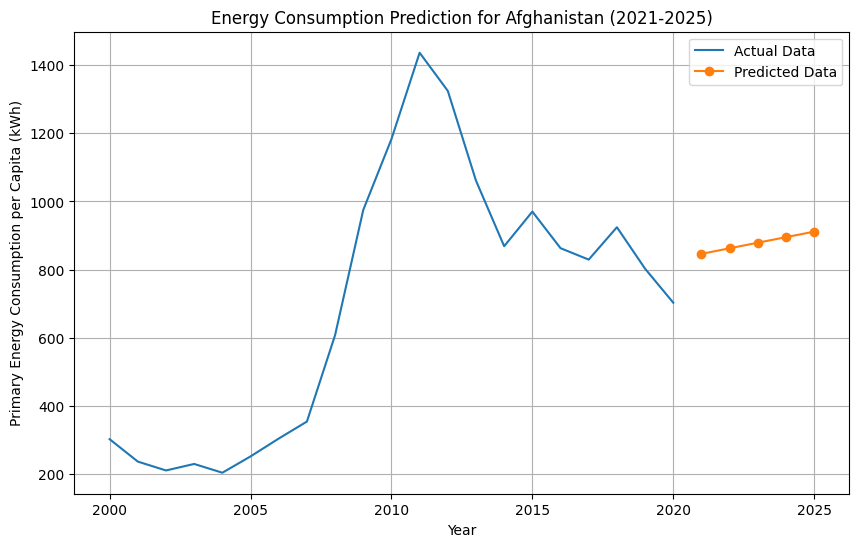

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


afghanistan_data = df[df['Entity'] == 'Afghanistan']

numeric_data = afghanistan_data.select_dtypes(include=[np.number])

# محاسبه ماتریس همبستگی
correlation_matrix = numeric_data.corr()

# انتخاب ویژگی‌هایی با همبستگی بالای 0.7 با هدف
target = 'Primary Energy Consumption per Capita (kWh)'
correlation_threshold = 0.7
relevant_features = correlation_matrix[target][correlation_matrix[target].abs() > correlation_threshold].index.tolist()
relevant_features.remove(target)  # حذف هدف از ویژگی‌ها

print(f"Features with correlation higher than {correlation_threshold}: {relevant_features}")

# آماده‌سازی داده‌ها
X = numeric_data[relevant_features]
y = numeric_data[target]

# مقیاس‌بندی داده‌ها
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

future_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Renewable Energy Share (%)': [45, 46, 47, 48, 49],  # فرضی
    'Energy Intensity (MJ/$2017 PPP GDP)': [1.4, 1.35, 1.3, 1.25, 1.2],
    'CO2 Emissions (kt)': [1000, 1050, 1100, 1150, 1200],  # فرضی
    'GDP per Capita': [650, 680, 710, 740, 770]  # فرضی
})

future_data = future_data[relevant_features]
future_data_scaled = scaler_X.transform(future_data)
future_data_scaled = future_data_scaled.reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

future_predictions = scaler_y.inverse_transform(future_predictions_scaled)

future_results = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions.flatten()
})

print(future_results)

plt.figure(figsize=(10, 6))
plt.plot(afghanistan_data['Year'], afghanistan_data[target], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title('Energy Consumption Prediction for Afghanistan (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


Features with correlation higher than 0.7: ['Renewable Energy Share (%)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 32s 32s/step - loss: 0.2918 - val_loss: 0.1481
Epoch 2/50
1/1 [==============================] - 0s 175ms/step - loss: 0.2863 - val_loss: 0.1445
Epoch 3/50
1/1 [==============================] - 0s 223ms/step - loss: 0.2808 - val_loss: 0.1408
Epoch 4/50
1/1 [==============================] - 0s 168ms/step - loss: 0.2753 - val_loss: 0.1372
Epoch 5/50
1/1 [==============================] - 0s 186ms/step - loss: 0.2698 - val_loss: 0.1337
Epoch 6/50
1/1 [==============================] - 0s 307ms/step - loss: 0.2643 - val_loss: 0.1301
Epoch 7/50
1/1 [==============================] - 0s 237ms/step - loss: 0.2587 - val_loss: 0.1265
Epoch 8/50
1/1 [==============================] - 0s 202ms/step - loss: 0.2531 - val_loss: 0.1229
Epoch 9/50
1/1 [==============================] - 0s 266ms/step 

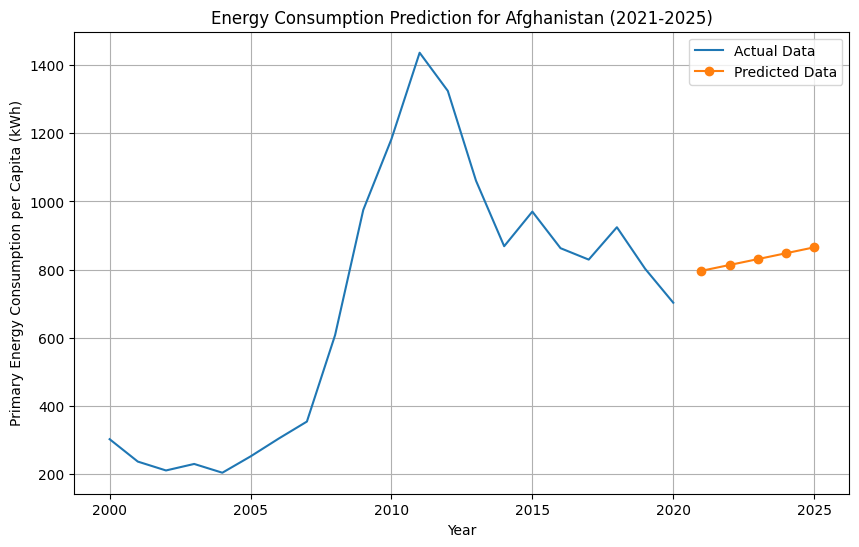

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
# Assuming the dataframe `df` is already loaded
# df = ...
# Select data for Afghanistan
afghanistan_data = df[df['Entity'] == 'Afghanistan']
# Select numeric columns only
numeric_data = afghanistan_data.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
# Select features with correlation higher than 0.7 with the target
target = 'Primary Energy Consumption per Capita (kWh)'
correlation_threshold = 0.7
relevant_features = correlation_matrix[target][correlation_matrix[target].abs() > correlation_threshold]
.index.tolist()
relevant_features.remove(target)  # Remove the target from features
print(f"Features with correlation higher than {correlation_threshold}: {relevant_features}")
# Prepare the data
X = numeric_data[relevant_features]
y = numeric_data[target]
# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
# Reshape the data for LSTM input
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# Create future data for predictions
future_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Renewable Energy Share (%)': [45, 46, 47, 48, 49],  # Example values
    'Energy Intensity (MJ/$2017 PPP GDP)': [1.4, 1.35, 1.3, 1.25, 1.2],
    'CO2 Emissions (kt)': [1000, 1050, 1100, 1150, 1200],  # Example values
    'GDP per Capita': [650, 680, 710, 740, 770]  # Example values
})
# Select only the relevant features for future data
future_data = future_data[relevant_features]
future_data_scaled = scaler_X.transform(future_data)
future_data_scaled = future_data_scaled.reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))
# Predict future values
future_predictions_scaled = model.predict(future_data_scaled)
future_predictions = scaler_y.inverse_transform(future_predictions_scaled)
# Display the future results in a table
future_results = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions.flatten()
})

print(future_results)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(afghanistan_data['Year'], afghanistan_data[target], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title('Energy Consumption Prediction for Afghanistan (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


LSTM OTHER COUNTIRIES NOT USEFUL FOR ENERGY


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

    Year  Predicted Primary Energy Consumption per Capita (kWh)
20  2021                                         743.287882    
21  2022                                         750.270764    
22  2023                                         722.687834    
23  2024                                         726.472505    
24  2025                                         750.513429    


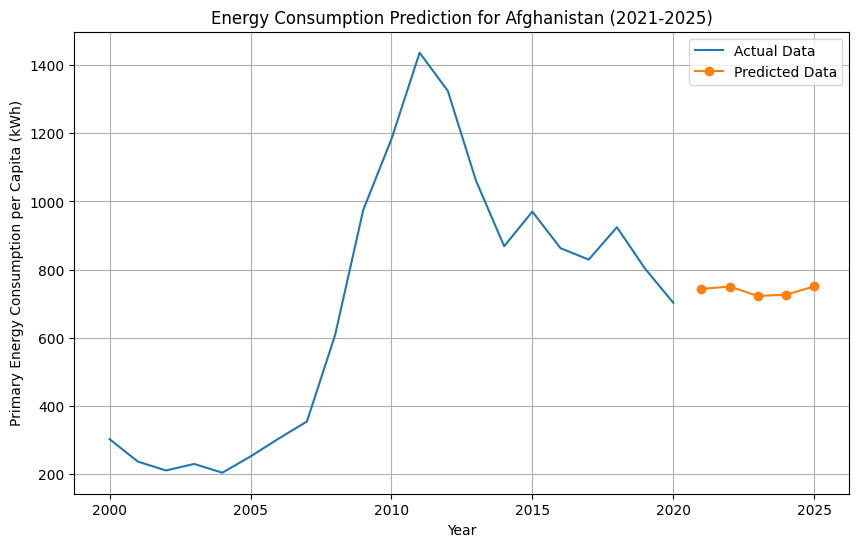

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'Afghanistan'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و مصرف انرژی اولیه سرانه
time_series_data = country_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)

# نمایش نتایج به صورت جدول
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted Primary Energy Consumption per Capita (kWh)': future_forecast
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['Primary Energy Consumption per Capita (kWh)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()

Features with correlation higher than 0.7 for Germany: ['Year', 'Electricity from Fossil Fuels (TWh)', 'Electricity from Nuclear (TWh)', 'Electricity from Renewables (TWh)', 'Low-carbon Electricity (%)', 'CO2 Emissions (kt)', 'Renewables (% of Equivalent Primary Energy)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.4649 - val_loss: 0.6057
Epoch 2/50
1/1 [==============================] - 0s 39ms/step - loss: 0.4555 - val_loss: 0.5946
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.4462 - val_loss: 0.5837
Epoch 4/50
1/1 [==============================] - 0s 47ms/step - loss: 0.4370 - val_loss: 0.5729
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 0.4280 - val_loss: 0.5622
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 0.4190 - val_loss: 0.5515
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 0.4101 - val_loss: 0.5407
Epoch 8/50
1/1 [================

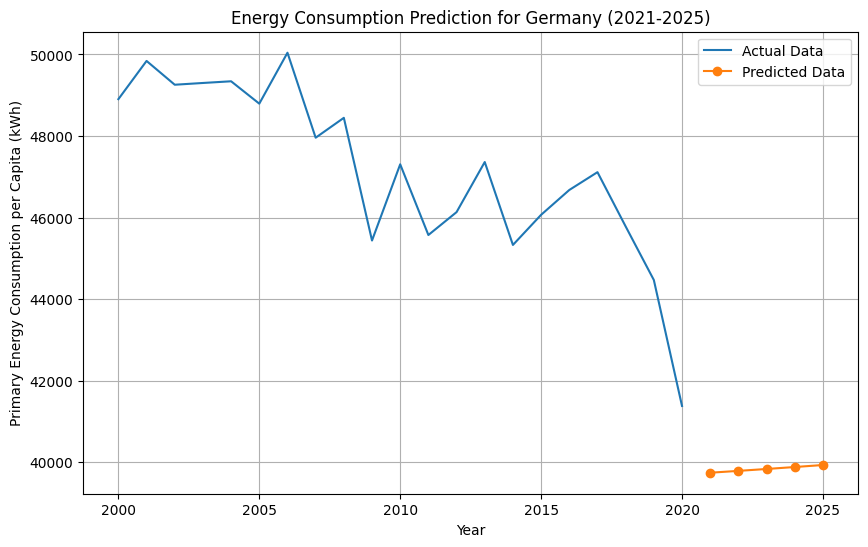

Features with correlation higher than 0.7 for India: ['Year', 'Electricity Access (%)', 'Clean Cooking Fuels Access', 'Renewable Electricity Capacity (per capita)', 'Renewable Energy Share (%)', 'Electricity from Fossil Fuels (TWh)', 'Electricity from Nuclear (TWh)', 'Electricity from Renewables (TWh)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.3808 - val_loss: 0.3184
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 0.3708 - val_loss: 0.3105
Epoch 3/50
1/1 [==============================] - 0s 42ms/step - loss: 0.3612 - val_loss: 0.3029
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 0.3518 - val_loss: 0.2955
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 0.3427 - val_loss: 0.2882
Epoch 6/50
1/1 [==============================] - 0s 43ms/step - loss: 0.3337 - val_loss: 0.2811
Epoch 7/50
1/1 [====================

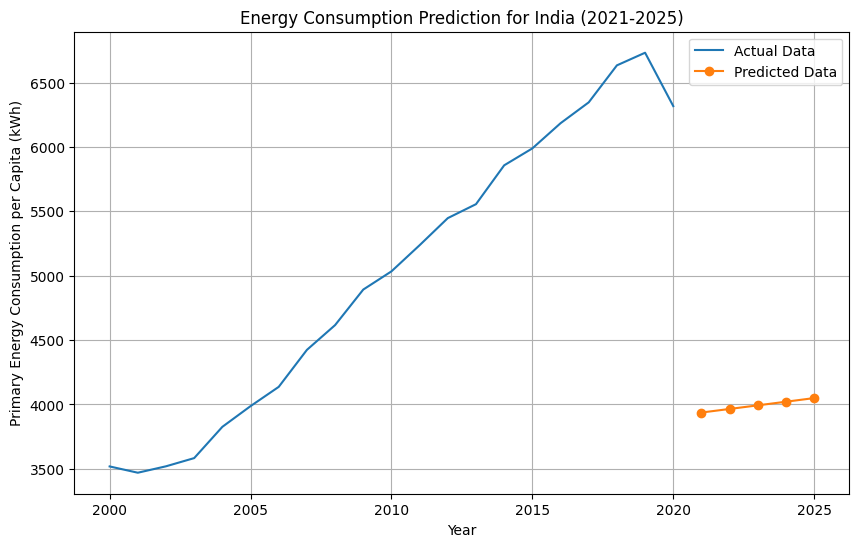

Features with correlation higher than 0.7 for United States: ['Year', 'Renewable Energy Share (%)', 'Electricity from Renewables (TWh)', 'Low-carbon Electricity (%)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'Renewables (% of Equivalent Primary Energy)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.3262 - val_loss: 0.4402
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 0.3190 - val_loss: 0.4319
Epoch 3/50
1/1 [==============================] - 0s 42ms/step - loss: 0.3119 - val_loss: 0.4237
Epoch 4/50
1/1 [==============================] - 0s 40ms/step - loss: 0.3049 - val_loss: 0.4156
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 0.2979 - val_loss: 0.4074
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.2909 - val_loss: 0.3992
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.2839 - val_loss: 0.3909
Epoch 8/50
1/1 [==============

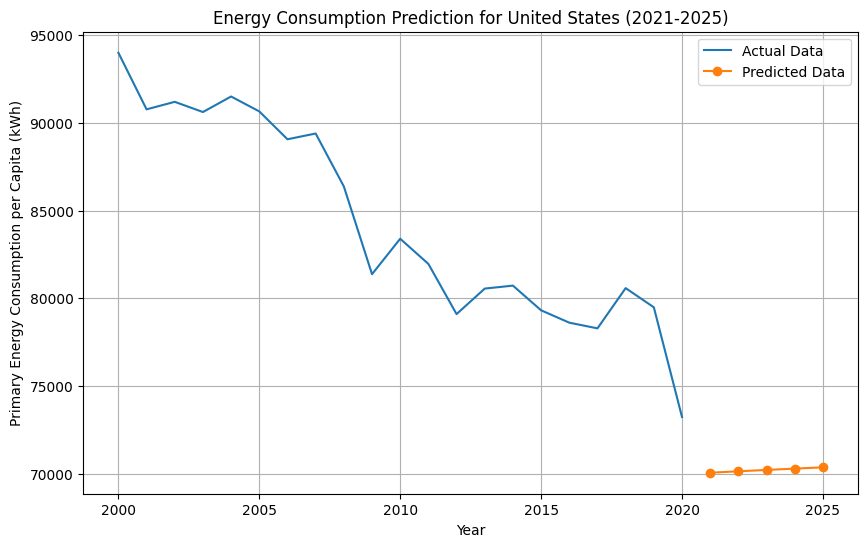

Features with correlation higher than 0.7 for China: ['Year', 'Electricity Access (%)', 'Clean Cooking Fuels Access', 'Renewable Electricity Capacity (per capita)', 'Renewable Energy Share (%)', 'Electricity from Fossil Fuels (TWh)', 'Electricity from Nuclear (TWh)', 'Electricity from Renewables (TWh)', 'Low-carbon Electricity (%)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'Renewables (% of Equivalent Primary Energy)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.4284 - val_loss: 0.3108
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 0.4145 - val_loss: 0.3003
Epoch 3/50
1/1 [==============================] - 0s 46ms/step - loss: 0.4007 - val_loss: 0.2899
Epoch 4/50
1/1 [==============================] - 0s 43ms/step - loss: 0.3871 - val_loss: 0.2795
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 0.3734 - val_loss: 0.2691
Epoch 6/50
1/1 [==============================] - 0s 42m

1/1 [==============================] - 1s 775ms/step


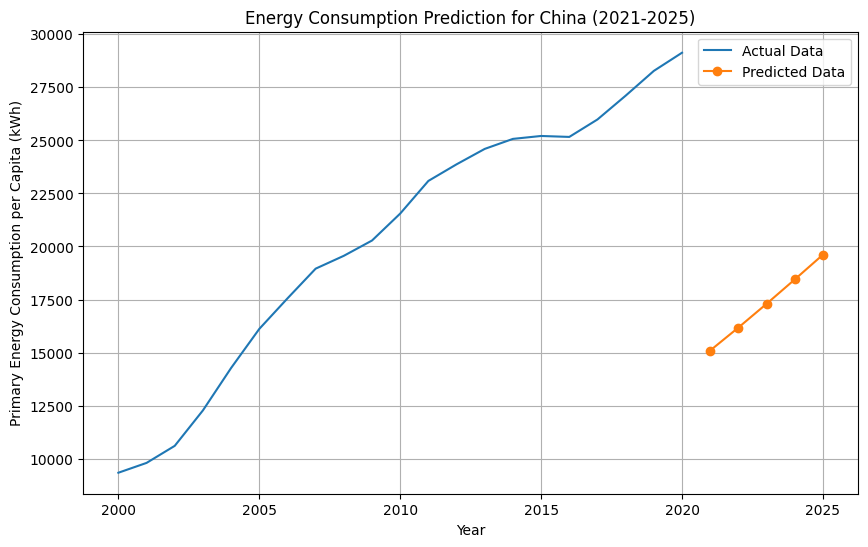

Features with correlation higher than 0.7 for Argentina: ['Electricity Access (%)', 'Clean Cooking Fuels Access', 'Electricity from Fossil Fuels (TWh)', 'Low-carbon Electricity (%)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'Renewables (% of Equivalent Primary Energy)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.4833 - val_loss: 0.4845
Epoch 2/50
1/1 [==============================] - 0s 71ms/step - loss: 0.4713 - val_loss: 0.4728
Epoch 3/50
1/1 [==============================] - 0s 69ms/step - loss: 0.4593 - val_loss: 0.4612
Epoch 4/50
1/1 [==============================] - 0s 76ms/step - loss: 0.4475 - val_loss: 0.4495
Epoch 5/50
1/1 [==============================] - 0s 63ms/step - loss: 0.4358 - val_loss: 0.4379
Epoch 6/50
1/1 [==============================] - 0s 57ms/step - loss: 0.4240 - val_loss: 0.4262
Epoch 7/50
1/1 [==============================] - 0s 57ms/step - loss: 0.4123 - val_loss: 0.4145
Epoch 8/50
1/1

1/1 [==============================] - 1s 773ms/step


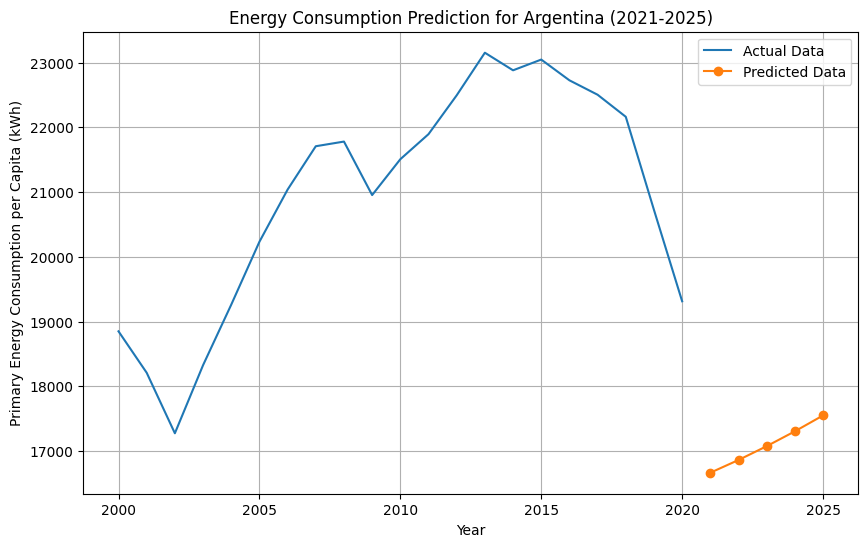

Future predictions for Germany:
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       39739.988281    
1  2022                                       39785.175781    
2  2023                                       39831.773438    
3  2024                                       39879.769531    
4  2025                                       39929.167969    


Future predictions for India:
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                        3937.228516    
1  2022                                        3965.129639    
2  2023                                        3993.161133    
3  2024                                        4021.306396    
4  2025                                        4049.547852    


Future predictions for United States:
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       70060.875000    
1  2022       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# فرض می‌کنیم که df از قبل بارگذاری شده است
# df = ...

countries = ['Germany', 'India', 'United States', 'China', 'Argentina']

results = {}

for country in countries:
    # انتخاب داده‌های کشور مورد نظر
    country_data = df[df['Entity'] == country]

    # انتخاب فقط ستون‌های عددی برای محاسبه ماتریس همبستگی
    numeric_data = country_data.select_dtypes(include=[np.number])

    # محاسبه ماتریس همبستگی
    correlation_matrix = numeric_data.corr()

    # انتخاب ویژگی‌هایی با همبستگی بالای 0.7 با هدف
    target = 'Primary Energy Consumption per Capita (kWh)'
    correlation_threshold = 0.7
    relevant_features = correlation_matrix[target][correlation_matrix[target].abs() > correlation_threshold].index.tolist()
    relevant_features.remove(target)  # حذف هدف از ویژگی‌ها

    print(f"Features with correlation higher than {correlation_threshold} for {country}: {relevant_features}")

    # آماده‌سازی داده‌ها
    X = numeric_data[relevant_features]
    y = numeric_data[target]

    # مقیاس‌بندی داده‌ها
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

    # آماده‌سازی داده‌ها برای LSTM
    X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

    # تقسیم داده‌ها به مجموعه آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

    # ایجاد و آموزش مدل LSTM
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # ایجاد داده‌های پیش‌بینی برای سال‌های 2021 تا 2025
    future_data = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Renewable Energy Share (%)': [45, 46, 47, 48, 49],  # فرضی
        'Energy Intensity (MJ/$2017 PPP GDP)': [1.4, 1.35, 1.3, 1.25, 1.2],
        'CO2 Emissions (kt)': [1000, 1050, 1100, 1150, 1200],  # فرضی
        'GDP per Capita': [650, 680, 710, 740, 770],  # فرضی
        'Electricity Access (%)': [95, 96, 97, 98, 99],  # فرضی
        'Clean Cooking Fuels Access': [90, 91, 92, 93, 94],  # فرضی
        'Electricity from Fossil Fuels (TWh)': [50, 55, 60, 65, 70],  # فرضی
        'Low-carbon Electricity (%)': [30, 31, 32, 33, 34],  # فرضی
        'Renewables (% of Equivalent Primary Energy)': [20, 21, 22, 23, 24]  # فرضی
    })

    # اطمینان حاصل کردن از وجود تمام ستون‌های مورد نیاز در داده‌های آینده
    missing_features = [feature for feature in relevant_features if feature not in future_data.columns]
    for feature in missing_features:
        future_data[feature] = [0] * len(future_data)  # یا هر مقدار فرضی دیگری

    # فیلتر کردن داده‌های آینده با استفاده از ویژگی‌های مرتبط
    future_data = future_data[relevant_features]
    future_data_scaled = scaler_X.transform(future_data)
    future_data_scaled = future_data_scaled.reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

    # پیش‌بینی
    future_predictions_scaled = model.predict(future_data_scaled)
    future_predictions = scaler_y.inverse_transform(future_predictions_scaled)

    # ذخیره نتایج
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions.flatten()
    })
    results[country] = future_results

    # نمایش نتایج به صورت نمودار
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data[target], label='Actual Data')
    plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Primary Energy Consumption per Capita (kWh)')
    plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# نمایش نتایج به صورت جدول
for country, future_results in results.items():
    print(f"Future predictions for {country}:")
    print(future_results)
    print("\n")


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

    Year  Predicted Primary Energy Consumption per Capita (kWh)
20  2021                                       20727.993378    
21  2022                                       20819.981149    
22  2023                                       20509.853898    
23  2024                                       20360.482813    
24  2025                                       20195.196815    


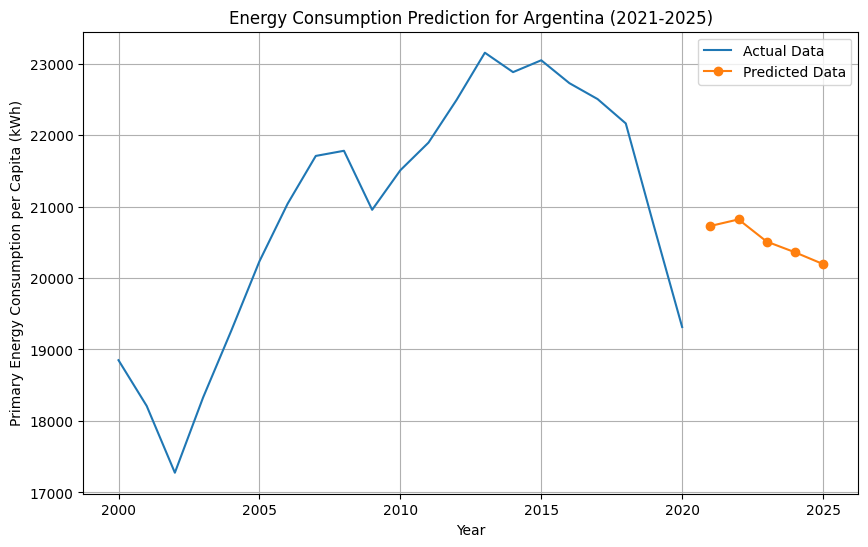

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# فرض می‌کنیم که df از قبل بارگذاری شده است
# df = ...

country = 'Argentina'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و مصرف انرژی اولیه سرانه
time_series_data = country_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)

# نمایش نتایج به صورت جدول
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted Primary Energy Consumption per Capita (kWh)': future_forecast
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['Primary Energy Consumption per Capita (kWh)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

    Year  Predicted Primary Energy Consumption per Capita (kWh)
20  2021                                       28900.592090    
21  2022                                       29246.307337    
22  2023                                       29735.610470    
23  2024                                       30380.305431    
24  2025                                       31003.816336    


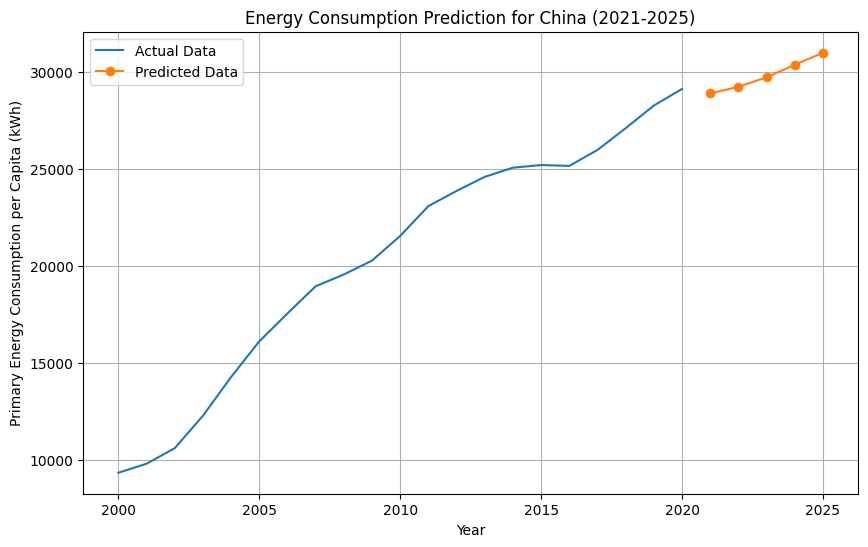

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# Assuming the dataframe `df` is already loaded
# df = ...
country = 'China'
# Select data for the specified country
country_data = df[df['Entity'] == country]
# Select the Year and Primary Energy Consumption columns
time_series_data = country_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]
# Set Year as the index
time_series_data.set_index('Year', inplace=True)
# Split the data into training and testing sets
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]
# Create and train the ARIMA model with manual settings
arima_model = ARIMA(train_data, order=(5, 1, 0))  # (p, d, q) settings can be changed
arima_model_fit = arima_model.fit()
# Forecast
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
# Display results in a table
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted Primary Energy Consumption per Capita (kWh)': future_forecast
})
# Display the table
print(future_results)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['Primary Energy Consumption per Capita (kWh)'],
         label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)']
         , label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

    Year  Predicted Primary Energy Consumption per Capita (kWh)
20  2021                                        6959.255475    
21  2022                                        7095.294985    
22  2023                                        7262.156069    
23  2024                                        7390.588110    
24  2025                                        7534.921241    


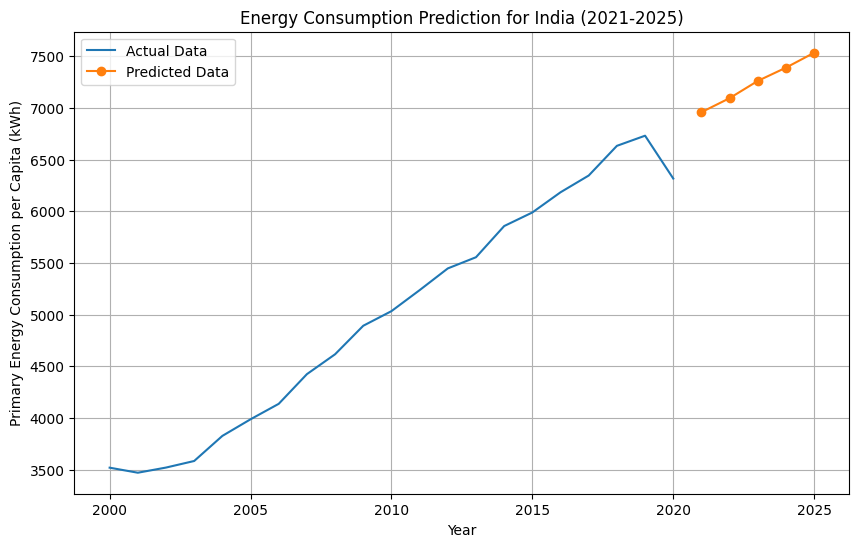

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'India'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و مصرف انرژی اولیه سرانه
time_series_data = country_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)

# نمایش نتایج به صورت جدول
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted Primary Energy Consumption per Capita (kWh)': future_forecast
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['Primary Energy Consumption per Capita (kWh)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

    Year  Predicted Primary Energy Consumption per Capita (kWh)
20  2021                                       28900.592090    
21  2022                                       29246.307337    
22  2023                                       29735.610470    
23  2024                                       30380.305431    
24  2025                                       31003.816336    


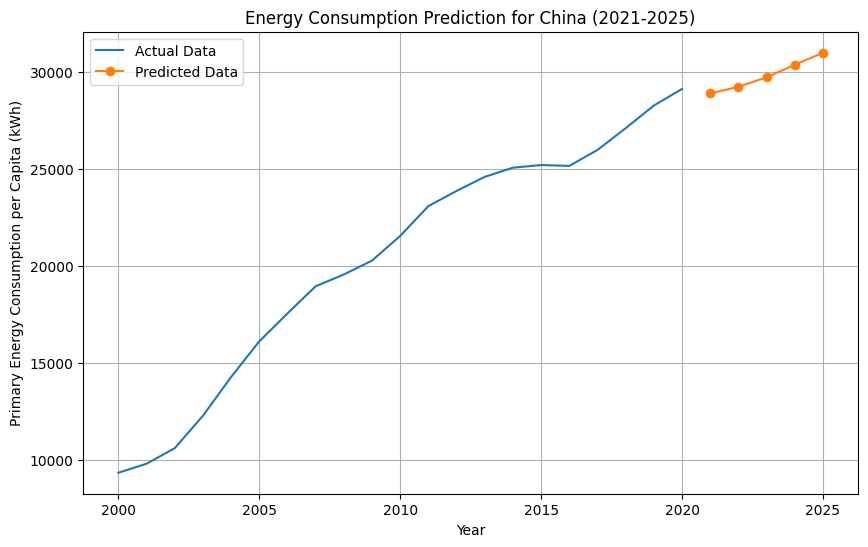

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'China'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و مصرف انرژی اولیه سرانه
time_series_data = country_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)

# نمایش نتایج به صورت جدول
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted Primary Energy Consumption per Capita (kWh)': future_forecast
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['Primary Energy Consumption per Capita (kWh)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


CO2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

    Year  Predicted CO2 Emissions (kt)
20  2021                   5525.387685
21  2022                   5775.520652
22  2023                   5789.415750
23  2024                   5512.411096
24  2025                   5591.318024


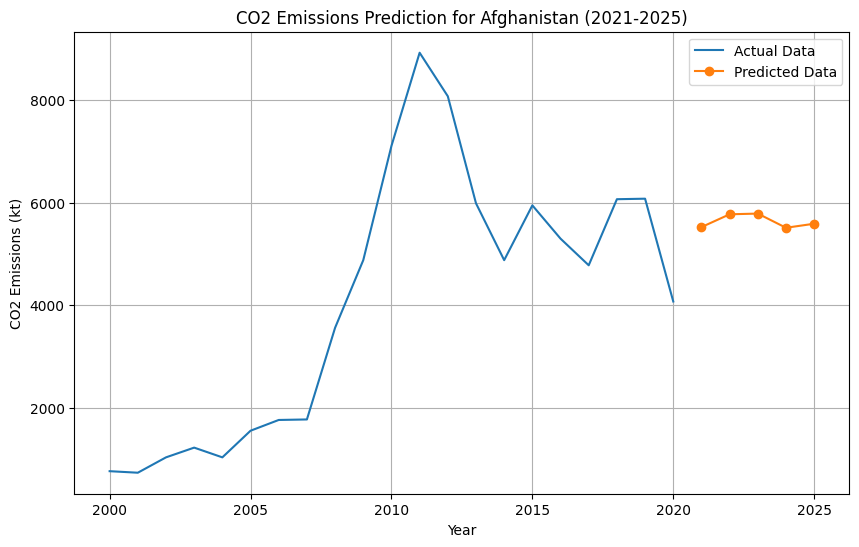

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'Afghanistan'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و انتشار CO2
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = time_series_data.index.astype(int)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)

# نمایش نتایج به صورت جدول
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted CO2 Emissions (kt)': future_forecast
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

    Year  Predicted CO2 Emissions (kt)
20  2021                   5525.387685
21  2022                   5775.520652
22  2023                   5789.415750
23  2024                   5512.411096
24  2025                   5591.318024


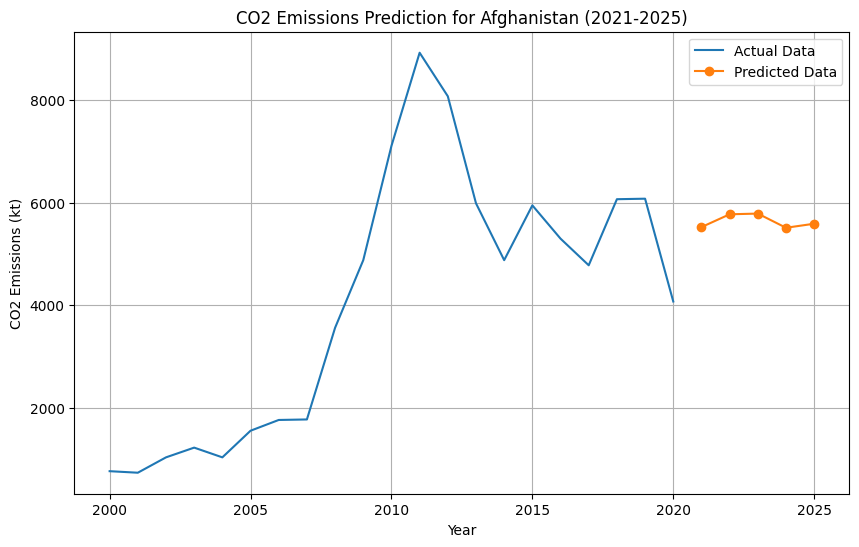

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# Specify the country
country = 'Afghanistan'
# Select data for the specified country
country_data = df[df['Entity'] == country]
# Select the Year and CO2 Emissions columns
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]
# Set Year as the index and ensure the index is of integer type
time_series_data.set_index('Year', inplace=True)
time_series_data.index = time_series_data.index.astype(int)
# Split the data into training and testing sets
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]
# Create and train the ARIMA model with manual settings
arima_model = ARIMA(train_data, order=(5, 1, 0))  # (p, d, q) settings can be changed
arima_model_fit = arima_model.fit()
# Forecast
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
# Display results in a table
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted CO2 Emissions (kt)': future_forecast
})
# Display the table
print(future_results)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integ

    Year  Predicted CO2 Emissions (kt)
20  2021                  1.005212e+06
21  2022                  4.494821e+04
22  2023                  9.880699e+05
23  2024                  1.232564e+04
24  2025                  9.483111e+05


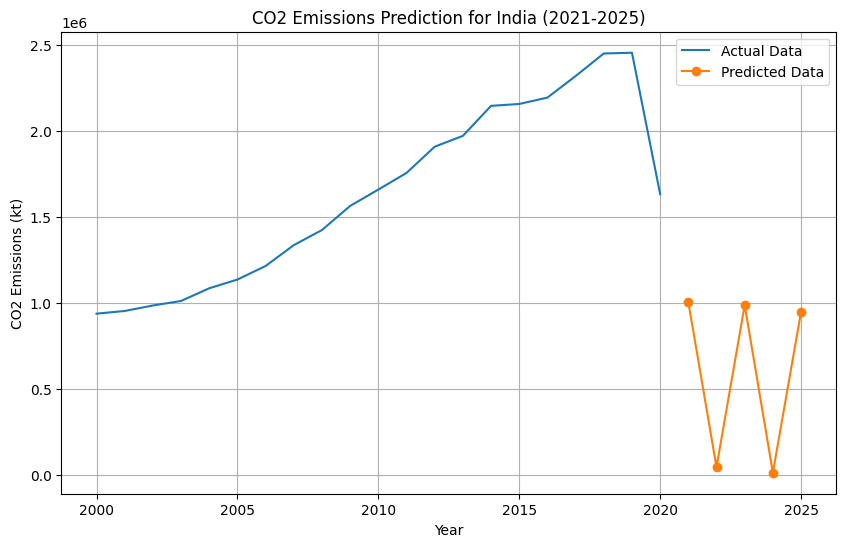

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'India'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و انتشار CO2
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = time_series_data.index.astype(int)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)

# نمایش نتایج به صورت جدول
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted CO2 Emissions (kt)': future_forecast
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

    Year  Predicted CO2 Emissions (kt)
20  2021                  4.811653e+06
21  2022                  4.817626e+06
22  2023                  4.816843e+06
23  2024                  4.814912e+06
24  2025                  4.814559e+06


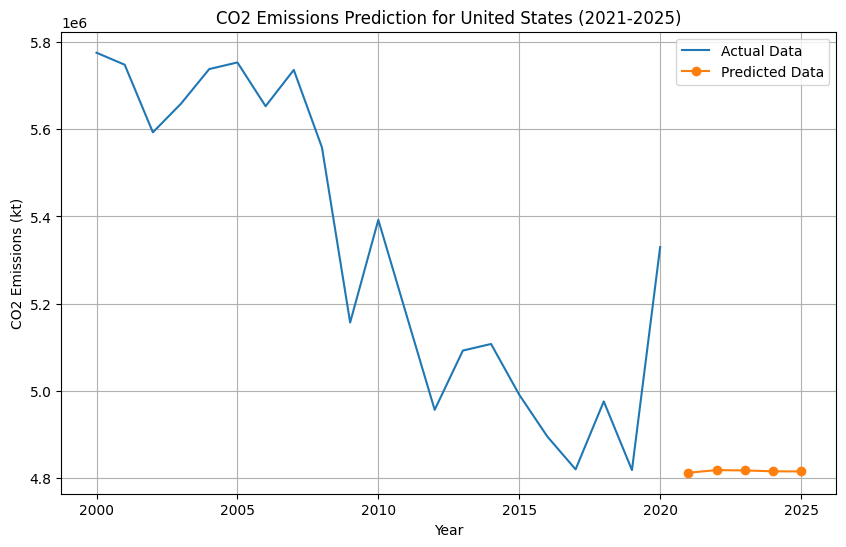

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'United States'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و انتشار CO2
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = time_series_data.index.astype(int)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index <= 2019]
test_data = time_series_data[time_series_data.index > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)

# نمایش نتایج به صورت جدول
future_years = [2021, 2022, 2023, 2024, 2025]
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted CO2 Emissions (kt)': future_forecast
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


   Year  Predicted CO2 Emissions (kt)
0  2021                  1.074221e+07
1  2022                  1.084314e+07
2  2023                  1.097737e+07
3  2024                  1.109378e+07
4  2025                  1.115872e+07


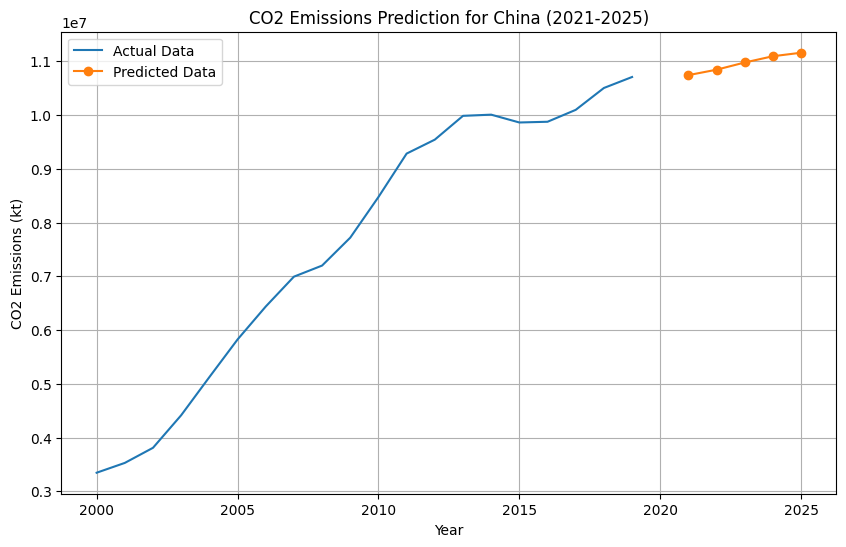

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'China'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و انتشار CO2
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = pd.to_datetime(time_series_data.index, format='%Y')

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index.year <= 2019]
test_data = time_series_data[time_series_data.index.year > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
future_forecast.index = pd.date_range(start='2021', periods=n_periods, freq='Y')

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': future_forecast.index.year,
    'Predicted CO2 Emissions (kt)': future_forecast.values
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(train_data.index.year, train_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


   Year  Predicted CO2 Emissions (kt)
0  2021                 168463.773728
1  2022                 168077.126832
2  2023                 166792.882417
3  2024                 165793.375612
4  2025                 165446.632838


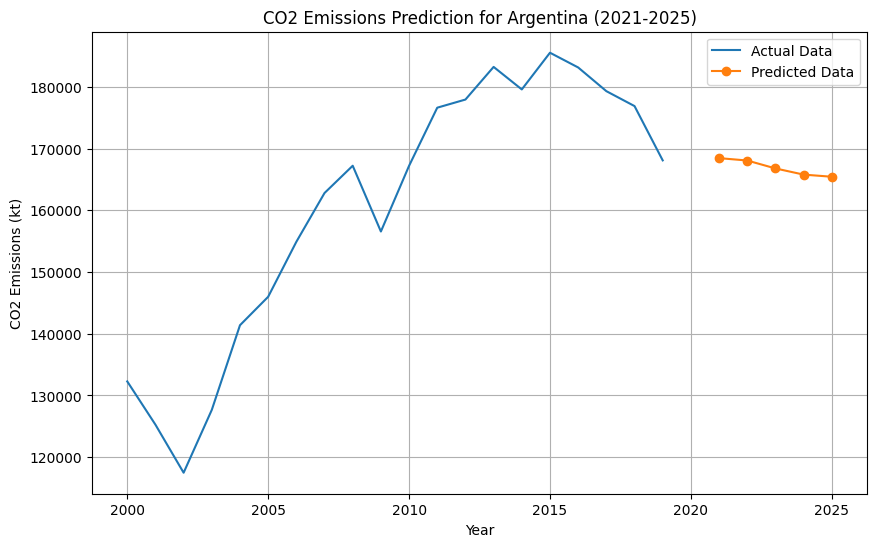

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'Argentina'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و انتشار CO2
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = pd.to_datetime(time_series_data.index, format='%Y')

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index.year <= 2019]
test_data = time_series_data[time_series_data.index.year > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
future_forecast.index = pd.date_range(start='2021', periods=n_periods, freq='Y')

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': future_forecast.index.year,
    'Predicted CO2 Emissions (kt)': future_forecast.values
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(train_data.index.year, train_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


   Year  Predicted CO2 Emissions (kt)
0  2021                 580977.207698
1  2022                 581264.761148
2  2023                 581383.561364
3  2024                 581680.611276
4  2025                 581683.771790


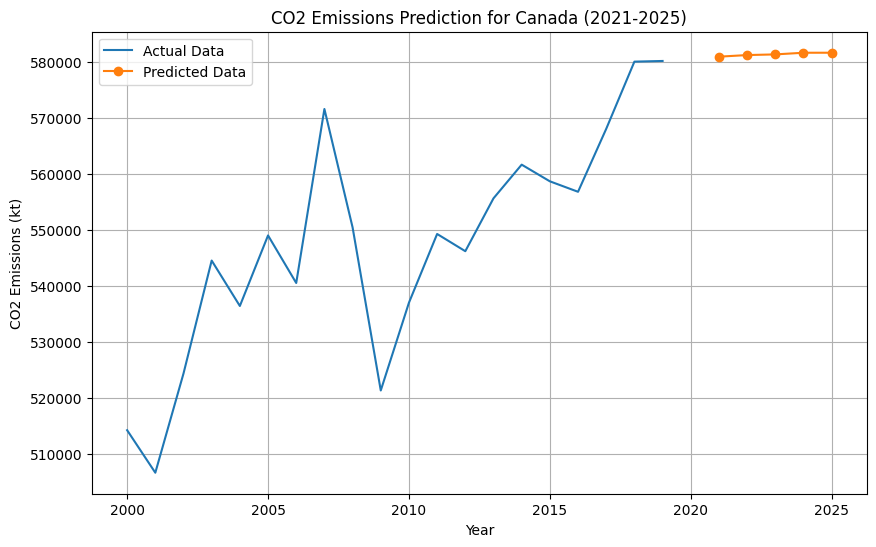

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'Canada'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و انتشار CO2
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = pd.to_datetime(time_series_data.index, format='%Y')

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index.year <= 2019]
test_data = time_series_data[time_series_data.index.year > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
future_forecast.index = pd.date_range(start='2021', periods=n_periods, freq='Y')

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': future_forecast.index.year,
    'Predicted CO2 Emissions (kt)': future_forecast.values
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(train_data.index.year, train_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                      108028.379827    
1  2022                                      107989.828243    
2  2023                                      107993.848848    
3  2024                                      107980.855788    
4  2025                                      107987.707482    


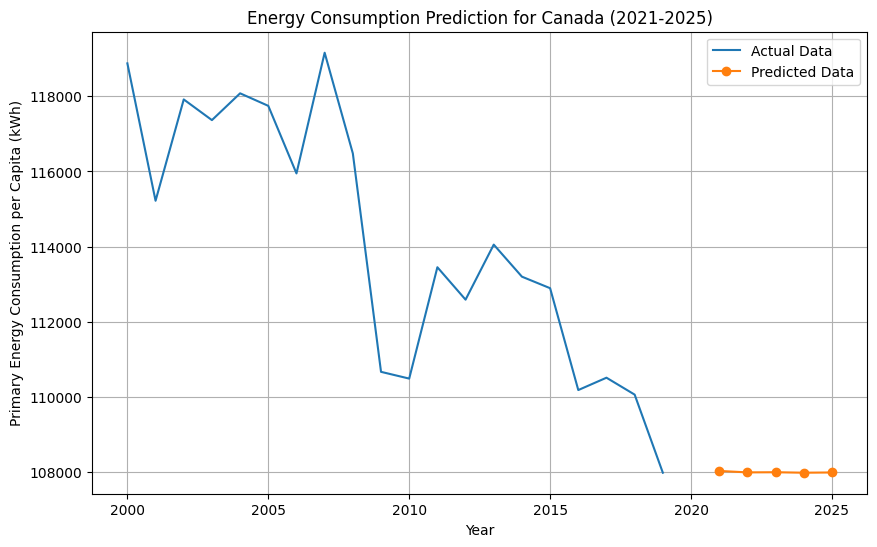

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'Canada'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و مصرف انرژی اولیه سرانه
time_series_data = country_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = pd.to_datetime(time_series_data.index, format='%Y')

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index.year <= 2019]
test_data = time_series_data[time_series_data.index.year > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
future_forecast.index = pd.date_range(start='2021', periods=n_periods, freq='Y')

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': future_forecast.index.year,
    'Predicted Primary Energy Consumption per Capita (kWh)': future_forecast.values
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(train_data.index.year, train_data['Primary Energy Consumption per Capita (kWh)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


   Year  Predicted CO2 Emissions (kt)
0  2021                 348226.128302
1  2022                 348104.452418
2  2023                 347711.206360
3  2024                 347639.115295
4  2025                 347579.853521


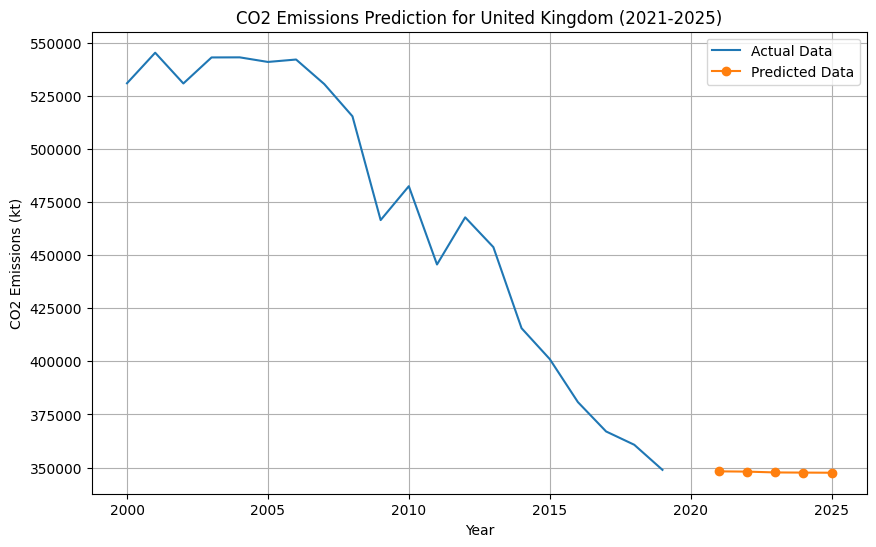

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'United Kingdom'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و انتشار CO2
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = pd.to_datetime(time_series_data.index, format='%Y')

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index.year <= 2019]
test_data = time_series_data[time_series_data.index.year > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
future_forecast.index = pd.date_range(start='2021', periods=n_periods, freq='Y')

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': future_forecast.index.year,
    'Predicted CO2 Emissions (kt)': future_forecast.values
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(train_data.index.year, train_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       32888.044820    
1  2022                                       32889.647027    
2  2023                                       32855.243084    
3  2024                                       32841.462780    
4  2025                                       32821.759119    


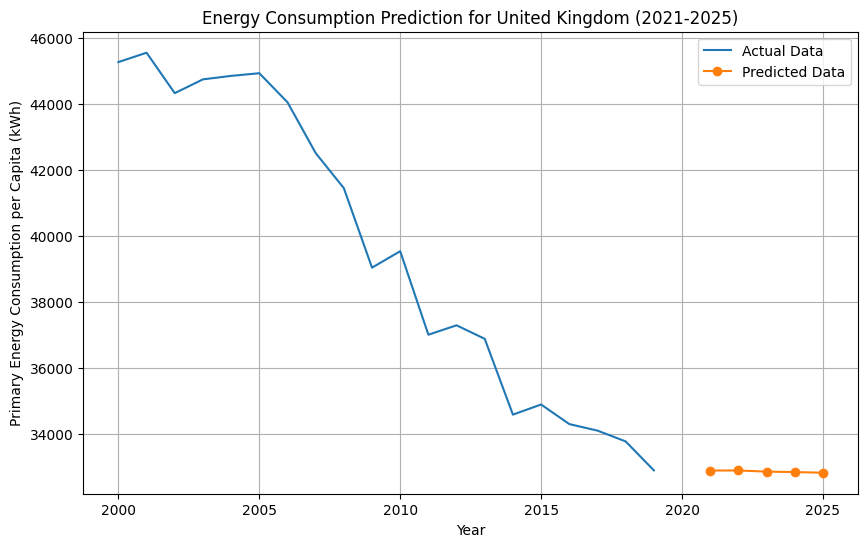

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'United Kingdom'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و مصرف انرژی اولیه سرانه
time_series_data = country_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = pd.to_datetime(time_series_data.index, format='%Y')

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index.year <= 2019]
test_data = time_series_data[time_series_data.index.year > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
future_forecast.index = pd.date_range(start='2021', periods=n_periods, freq='Y')

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': future_forecast.index.year,
    'Predicted Primary Energy Consumption per Capita (kWh)': future_forecast.values
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(train_data.index.year, train_data['Primary Energy Consumption per Capita (kWh)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


   Year  Predicted CO2 Emissions (kt)
0  2021                 300771.781868
1  2022                 300731.965159
2  2023                 300630.843924
3  2024                 300468.276917
4  2025                 300380.365829


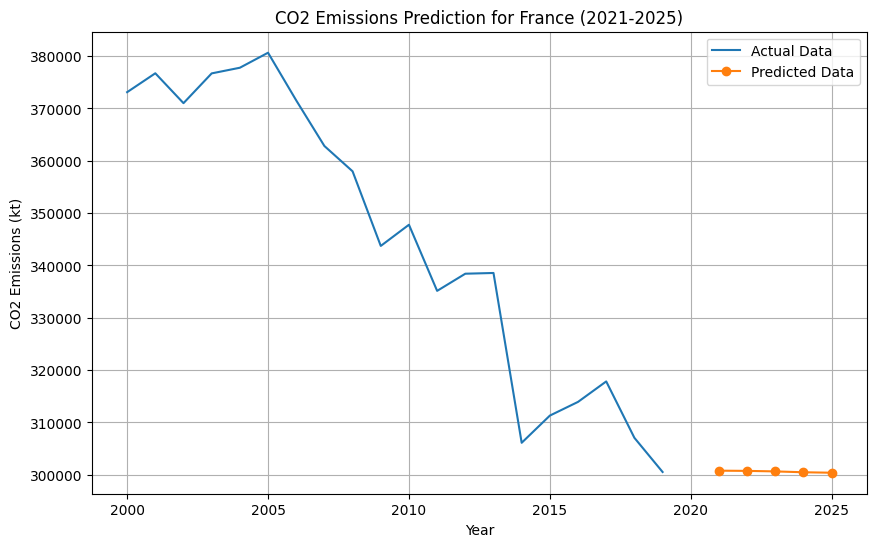

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'France'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و انتشار CO2
time_series_data = country_data[['Year', 'CO2 Emissions (kt)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = pd.to_datetime(time_series_data.index, format='%Y')

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index.year <= 2019]
test_data = time_series_data[time_series_data.index.year > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
future_forecast.index = pd.date_range(start='2021', periods=n_periods, freq='Y')

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': future_forecast.index.year,
    'Predicted CO2 Emissions (kt)': future_forecast.values
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(train_data.index.year, train_data['CO2 Emissions (kt)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                         743.287882    
1  2022                                         750.270764    
2  2023                                         722.687834    
3  2024                                         726.472505    
4  2025                                         750.513429    


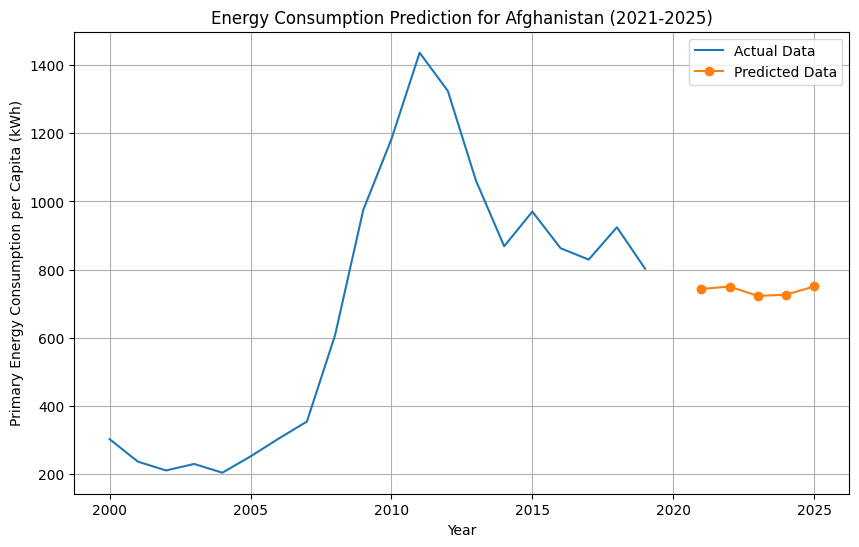

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

country = 'Afghanistan'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون سال و مصرف انرژی اولیه سرانه
time_series_data = country_data[['Year', 'Primary Energy Consumption per Capita (kWh)']]

# تنظیم سال به عنوان شاخص
time_series_data.set_index('Year', inplace=True)
time_series_data.index = pd.to_datetime(time_series_data.index, format='%Y')

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data = time_series_data[time_series_data.index.year <= 2019]
test_data = time_series_data[time_series_data.index.year > 2019]

# ایجاد و آموزش مدل ARIMA با تنظیمات دستی
arima_model = ARIMA(train_data, order=(5, 1, 0))  # تنظیمات (p, d, q) را می‌توان تغییر داد
arima_model_fit = arima_model.fit()

# پیش‌بینی
n_periods = 5
future_forecast = arima_model_fit.forecast(steps=n_periods)
future_forecast.index = pd.date_range(start='2021', periods=n_periods, freq='Y')

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': future_forecast.index.year,
    'Predicted Primary Energy Consumption per Capita (kWh)': future_forecast.values
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(train_data.index.year, train_data['Primary Energy Consumption per Capita (kWh)'], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


Features with correlation higher than 0.7: ['Electricity Access (%)', 'Clean Cooking Fuels Access', 'Electricity from Fossil Fuels (TWh)', 'Low-carbon Electricity (%)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'Renewables (% of Equivalent Primary Energy)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.4998 - val_loss: 0.5003
Epoch 2/50
1/1 [==============================] - 0s 39ms/step - loss: 0.4893 - val_loss: 0.4903
Epoch 3/50
1/1 [==============================] - 0s 40ms/step - loss: 0.4792 - val_loss: 0.4806
Epoch 4/50
1/1 [==============================] - 0s 48ms/step - loss: 0.4692 - val_loss: 0.4710
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 0.4594 - val_loss: 0.4615
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 0.4497 - val_loss: 0.4521
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.4401 - val_loss: 0.4427
Epoch 8/50
1/1 [============

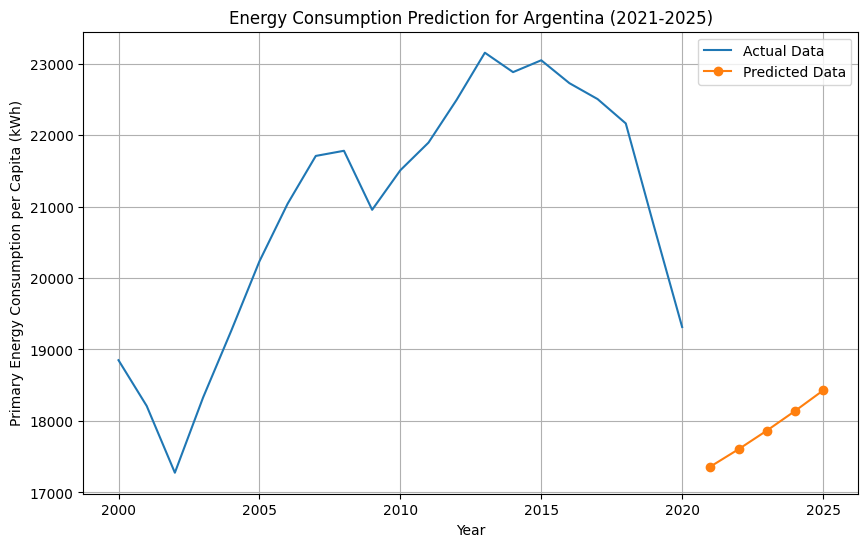

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

country = 'Argentina'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون‌های عددی
numeric_data = country_data.select_dtypes(include=[np.number])

# محاسبه ماتریس همبستگی
correlation_matrix = numeric_data.corr()

# انتخاب ویژگی‌هایی با همبستگی بالای 0.7 با هدف
target = 'Primary Energy Consumption per Capita (kWh)'
correlation_threshold = 0.7
relevant_features = correlation_matrix[target][correlation_matrix[target].abs() > correlation_threshold].index.tolist()
relevant_features.remove(target)  # حذف هدف از ویژگی‌ها

print(f"Features with correlation higher than {correlation_threshold}: {relevant_features}")

# آماده‌سازی داده‌ها
X = numeric_data[relevant_features]
y = numeric_data[target]

# مقیاس‌بندی داده‌ها
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# آماده‌سازی داده‌ها برای LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# ایجاد و آموزش مدل LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ایجاد داده‌های پیش‌بینی برای سال‌های 2021 تا 2025
future_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Renewable Energy Share (%)': [45, 46, 47, 48, 49],  # فرضی
    'Energy Intensity (MJ/$2017 PPP GDP)': [1.4, 1.35, 1.3, 1.25, 1.2],
    'CO2 Emissions (kt)': [1000, 1050, 1100, 1150, 1200],  # فرضی
    'GDP per Capita': [650, 680, 710, 740, 770],  # فرضی
    'Electricity Access (%)': [95, 96, 97, 98, 99],  # فرضی
    'Clean Cooking Fuels Access': [90, 91, 92, 93, 94],  # فرضی
    'Electricity from Fossil Fuels (TWh)': [60, 61, 62, 63, 64],  # فرضی
    'Low-carbon Electricity (%)': [30, 31, 32, 33, 34],  # فرضی
    'Renewables (% of Equivalent Primary Energy)': [20, 21, 22, 23, 24]  # فرضی
})

# فیلتر کردن داده‌های آینده با استفاده از ویژگی‌های مرتبط
future_data = future_data[relevant_features]
future_data_scaled = scaler_X.transform(future_data)
future_data_scaled = future_data_scaled.reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

# پیش‌بینی
future_predictions_scaled = model.predict(future_data_scaled)
future_predictions = scaler_y.inverse_transform(future_predictions_scaled)

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions.flatten()
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data[target], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


Features with correlation higher than 0.7: ['Year', 'Electricity from Fossil Fuels (TWh)', 'Electricity from Renewables (TWh)', 'Low-carbon Electricity (%)', 'GDP Growth']
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.5230 - val_loss: 0.6082
Epoch 2/50
1/1 [==============================] - 0s 59ms/step - loss: 0.5140 - val_loss: 0.5984
Epoch 3/50
1/1 [==============================] - 0s 52ms/step - loss: 0.5050 - val_loss: 0.5887
Epoch 4/50
1/1 [==============================] - 0s 71ms/step - loss: 0.4961 - val_loss: 0.5790
Epoch 5/50
1/1 [==============================] - 0s 71ms/step - loss: 0.4873 - val_loss: 0.5694
Epoch 6/50
1/1 [==============================] - 0s 61ms/step - loss: 0.4785 - val_loss: 0.5597
Epoch 7/50
1/1 [==============================] - 0s 80ms/step - loss: 0.4696 - val_loss: 0.5500
Epoch 8/50
1/1 [==============================] - 0s 47ms/step - loss: 0.4608 - val_loss: 0.5402
Epoch 9/50
1/1 [==============================] - 0s 4

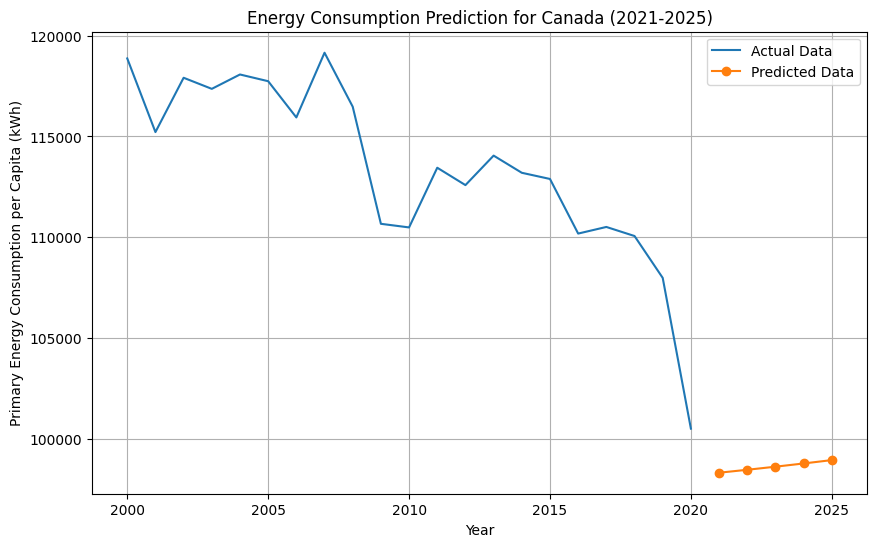

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

country = 'Canada'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون‌های عددی
numeric_data = country_data.select_dtypes(include=[np.number])

# محاسبه ماتریس همبستگی
correlation_matrix = numeric_data.corr()

# انتخاب ویژگی‌هایی با همبستگی بالای 0.7 با هدف
target = 'Primary Energy Consumption per Capita (kWh)'
correlation_threshold = 0.7
relevant_features = correlation_matrix[target][correlation_matrix[target].abs() > correlation_threshold].index.tolist()
relevant_features.remove(target)  # حذف هدف از ویژگی‌ها

print(f"Features with correlation higher than {correlation_threshold}: {relevant_features}")

# آماده‌سازی داده‌ها
X = numeric_data[relevant_features]
y = numeric_data[target]

# مقیاس‌بندی داده‌ها
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# آماده‌سازی داده‌ها برای LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# ایجاد و آموزش مدل LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ایجاد داده‌های پیش‌بینی برای سال‌های 2021 تا 2025
future_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Renewable Energy Share (%)': [45, 46, 47, 48, 49],  # فرضی
    'Energy Intensity (MJ/$2017 PPP GDP)': [1.4, 1.35, 1.3, 1.25, 1.2],
    'CO2 Emissions (kt)': [1000, 1050, 1100, 1150, 1200],  # فرضی
    'GDP per Capita': [650, 680, 710, 740, 770],  # فرضی
    'Electricity Access (%)': [95, 96, 97, 98, 99],  # فرضی
    'Clean Cooking Fuels Access': [90, 91, 92, 93, 94],  # فرضی
    'Electricity from Fossil Fuels (TWh)': [60, 61, 62, 63, 64],  # فرضی
    'Low-carbon Electricity (%)': [30, 31, 32, 33, 34],  # فرضی
    'Renewables (% of Equivalent Primary Energy)': [20, 21, 22, 23, 24],  # فرضی
    'Electricity from Renewables (TWh)': [30, 31, 32, 33, 34],  # فرضی
    'GDP Growth': [1.5, 1.6, 1.7, 1.8, 1.9]  # فرضی
})

# فیلتر کردن داده‌های آینده با استفاده از ویژگی‌های مرتبط
future_data = future_data[relevant_features]
future_data_scaled = scaler_X.transform(future_data)
future_data_scaled = future_data_scaled.reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

# پیش‌بینی
future_predictions_scaled = model.predict(future_data_scaled)
future_predictions = scaler_y.inverse_transform(future_predictions_scaled)

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions.flatten()
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data[target], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


Features with correlation higher than 0.7: ['Year', 'Electricity Access (%)', 'Clean Cooking Fuels Access', 'Renewable Electricity Capacity (per capita)', 'Renewable Energy Share (%)', 'Electricity from Fossil Fuels (TWh)', 'Electricity from Nuclear (TWh)', 'Electricity from Renewables (TWh)', 'Low-carbon Electricity (%)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'Renewables (% of Equivalent Primary Energy)', 'GDP per Capita']
Epoch 1/50
1/1 [==============================] - 33s 33s/step - loss: 0.4181 - val_loss: 0.3031
Epoch 2/50
1/1 [==============================] - 0s 116ms/step - loss: 0.4050 - val_loss: 0.2932
Epoch 3/50
1/1 [==============================] - 0s 108ms/step - loss: 0.3920 - val_loss: 0.2834
Epoch 4/50
1/1 [==============================] - 0s 108ms/step - loss: 0.3791 - val_loss: 0.2736
Epoch 5/50
1/1 [==============================] - 0s 55ms/step - loss: 0.3662 - val_loss: 0.2637
Epoch 6/50
1/1 [==============================] - 0s 160ms/st

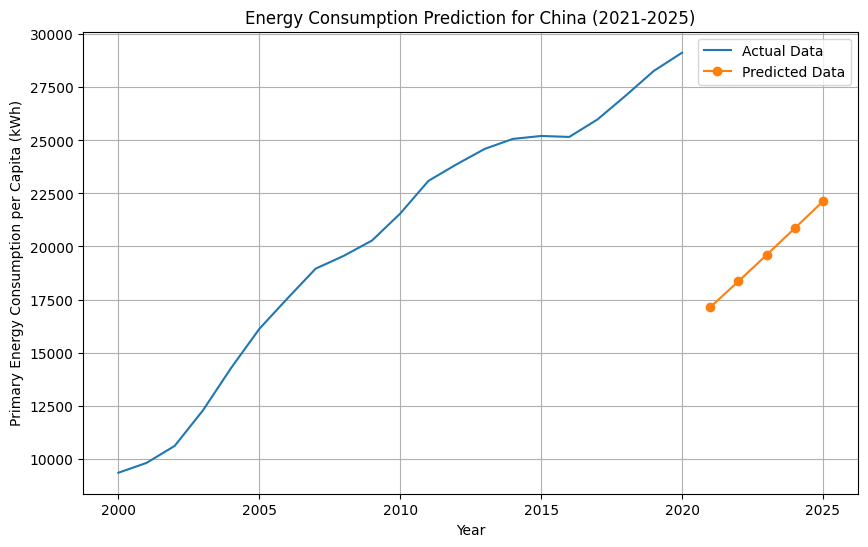

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

country = 'China'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون‌های عددی
numeric_data = country_data.select_dtypes(include=[np.number])

# محاسبه ماتریس همبستگی
correlation_matrix = numeric_data.corr()

# انتخاب ویژگی‌هایی با همبستگی بالای 0.7 با هدف
target = 'Primary Energy Consumption per Capita (kWh)'
correlation_threshold = 0.7
relevant_features = correlation_matrix[target][correlation_matrix[target].abs() > correlation_threshold].index.tolist()
relevant_features.remove(target)  # حذف هدف از ویژگی‌ها

print(f"Features with correlation higher than {correlation_threshold}: {relevant_features}")

# آماده‌سازی داده‌ها
X = numeric_data[relevant_features]
y = numeric_data[target]

# مقیاس‌بندی داده‌ها
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# آماده‌سازی داده‌ها برای LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# ایجاد و آموزش مدل LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ایجاد داده‌های پیش‌بینی برای سال‌های 2021 تا 2025
future_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Renewable Energy Share (%)': [45, 46, 47, 48, 49],  # فرضی
    'Energy Intensity (MJ/$2017 PPP GDP)': [1.4, 1.35, 1.3, 1.25, 1.2],
    'CO2 Emissions (kt)': [1000, 1050, 1100, 1150, 1200],  # فرضی
    'GDP per Capita': [650, 680, 710, 740, 770],  # فرضی
    'Electricity Access (%)': [95, 96, 97, 98, 99],  # فرضی
    'Clean Cooking Fuels Access': [90, 91, 92, 93, 94],  # فرضی
    'Electricity from Fossil Fuels (TWh)': [60, 61, 62, 63, 64],  # فرضی
    'Low-carbon Electricity (%)': [30, 31, 32, 33, 34],  # فرضی
    'Renewables (% of Equivalent Primary Energy)': [20, 21, 22, 23, 24],  # فرضی
    'Electricity from Renewables (TWh)': [30, 31, 32, 33, 34],  # فرضی
    'GDP Growth': [1.5, 1.6, 1.7, 1.8, 1.9],  # فرضی
    'Renewable Electricity Capacity (per capita)': [200, 210, 220, 230, 240],  # فرضی
    'Electricity from Nuclear (TWh)': [50, 51, 52, 53, 54]  # فرضی
})

# نمایش ویژگی‌های منتخب و ستون‌های موجود در داده‌های آینده
print("Relevant features:", relevant_features)
print("Columns in future data:", future_data.columns)

# فیلتر کردن داده‌های آینده با استفاده از ویژگی‌های مرتبط
future_data = future_data[relevant_features]
future_data_scaled = scaler_X.transform(future_data)
future_data_scaled = future_data_scaled.reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

# پیش‌بینی
future_predictions_scaled = model.predict(future_data_scaled)
future_predictions = scaler_y.inverse_transform(future_predictions_scaled)

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions.flatten()
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data[target], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


Features with correlation higher than 0.7: ['Year', 'Renewable Energy Share (%)', 'Electricity from Fossil Fuels (TWh)', 'Electricity from Nuclear (TWh)', 'Electricity from Renewables (TWh)', 'Low-carbon Electricity (%)', 'Energy Intensity (MJ/$2017 PPP GDP)', 'CO2 Emissions (kt)', 'Renewables (% of Equivalent Primary Energy)']
Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 0.4117 - val_loss: 0.5166
Epoch 2/50
1/1 [==============================] - 0s 82ms/step - loss: 0.4009 - val_loss: 0.5038
Epoch 3/50
1/1 [==============================] - 0s 85ms/step - loss: 0.3902 - val_loss: 0.4910
Epoch 4/50
1/1 [==============================] - 0s 75ms/step - loss: 0.3794 - val_loss: 0.4782
Epoch 5/50
1/1 [==============================] - 0s 81ms/step - loss: 0.3687 - val_loss: 0.4654
Epoch 6/50
1/1 [==============================] - 0s 89ms/step - loss: 0.3580 - val_loss: 0.4525
Epoch 7/50
1/1 [==============================] - 0s 92ms/step - loss: 0.3473 - val_loss

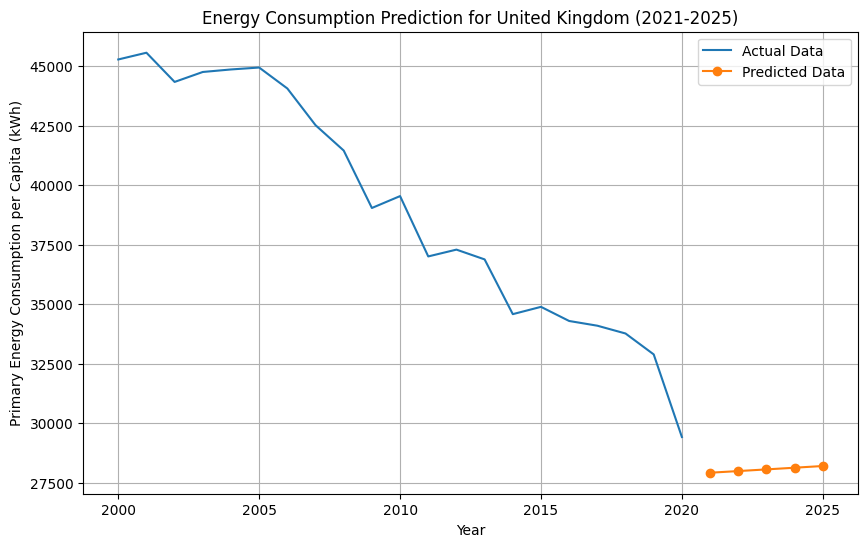

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

country = 'United Kingdom'

# انتخاب داده‌های کشور مورد نظر
country_data = df[df['Entity'] == country]

# انتخاب ستون‌های عددی
numeric_data = country_data.select_dtypes(include=[np.number])

# محاسبه ماتریس همبستگی
correlation_matrix = numeric_data.corr()

# انتخاب ویژگی‌هایی با همبستگی بالای 0.7 با هدف
target = 'Primary Energy Consumption per Capita (kWh)'
correlation_threshold = 0.7
relevant_features = correlation_matrix[target][correlation_matrix[target].abs() > correlation_threshold].index.tolist()
relevant_features.remove(target)  # حذف هدف از ویژگی‌ها

print(f"Features with correlation higher than {correlation_threshold}: {relevant_features}")

# آماده‌سازی داده‌ها
X = numeric_data[relevant_features]
y = numeric_data[target]

# مقیاس‌بندی داده‌ها
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# آماده‌سازی داده‌ها برای LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# ایجاد و آموزش مدل LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ایجاد داده‌های پیش‌بینی برای سال‌های 2021 تا 2025
future_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Renewable Energy Share (%)': [45, 46, 47, 48, 49],  # فرضی
    'Energy Intensity (MJ/$2017 PPP GDP)': [1.4, 1.35, 1.3, 1.25, 1.2],
    'CO2 Emissions (kt)': [1000, 1050, 1100, 1150, 1200],  # فرضی
    'GDP per Capita': [650, 680, 710, 740, 770],  # فرضی
    'Electricity Access (%)': [95, 96, 97, 98, 99],  # فرضی
    'Clean Cooking Fuels Access': [90, 91, 92, 93, 94],  # فرضی
    'Electricity from Fossil Fuels (TWh)': [60, 61, 62, 63, 64],  # فرضی
    'Low-carbon Electricity (%)': [30, 31, 32, 33, 34],  # فرضی
    'Renewables (% of Equivalent Primary Energy)': [20, 21, 22, 23, 24],  # فرضی
    'Electricity from Renewables (TWh)': [30, 31, 32, 33, 34],  # فرضی
    'GDP Growth': [1.5, 1.6, 1.7, 1.8, 1.9],  # فرضی
    'Renewable Electricity Capacity (per capita)': [200, 210, 220, 230, 240],  # فرضی
    'Electricity from Nuclear (TWh)': [50, 51, 52, 53, 54]  # فرضی
})

# نمایش ویژگی‌های منتخب و ستون‌های موجود در داده‌های آینده
print("Relevant features:", relevant_features)
print("Columns in future data:", future_data.columns)

# فیلتر کردن داده‌های آینده با استفاده از ویژگی‌های مرتبط
future_data = future_data[relevant_features]
future_data_scaled = scaler_X.transform(future_data)
future_data_scaled = future_data_scaled.reshape((future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

# پیش‌بینی
future_predictions_scaled = model.predict(future_data_scaled)
future_predictions = scaler_y.inverse_transform(future_predictions_scaled)

# نمایش نتایج به صورت جدول
future_results = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions.flatten()
})

# نمایش جدول
print(future_results)

# نمایش نتایج به صورت نمودار
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data[target], label='Actual Data')
plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'], label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption per Capita (kWh)')
plt.title(f'Energy Consumption Prediction for {country} (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()


Metrics for Afghanistan:
MAE: 4.369784908817029
MSE: 45.95155977154885
RMSE: 6.778757981485167
R²: 0.9588313131505684
   Year  Predicted Electricity Access (%)
0  2021                        112.286009
1  2022                        117.780603
2  2023                        123.283201
3  2024                        128.793804
4  2025                        134.312410


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


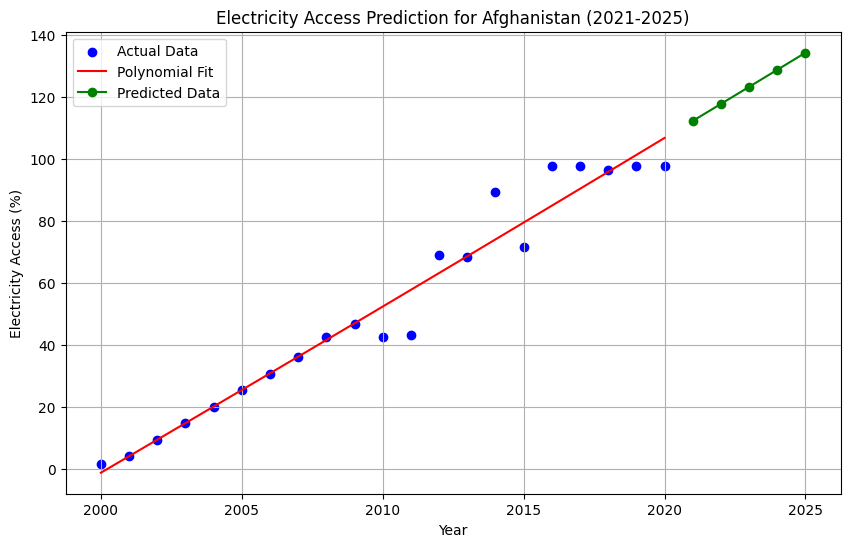

Metrics for Argentina:
MAE: 0.2535101657668873
MSE: 0.09006746474184688
RMSE: 0.3001124201725861
R²: 0.9632080201593641
   Year  Predicted Electricity Access (%)
0  2021                        100.420182
1  2022                        100.512658
2  2023                        100.591363
3  2024                        100.656296
4  2025                        100.707458


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


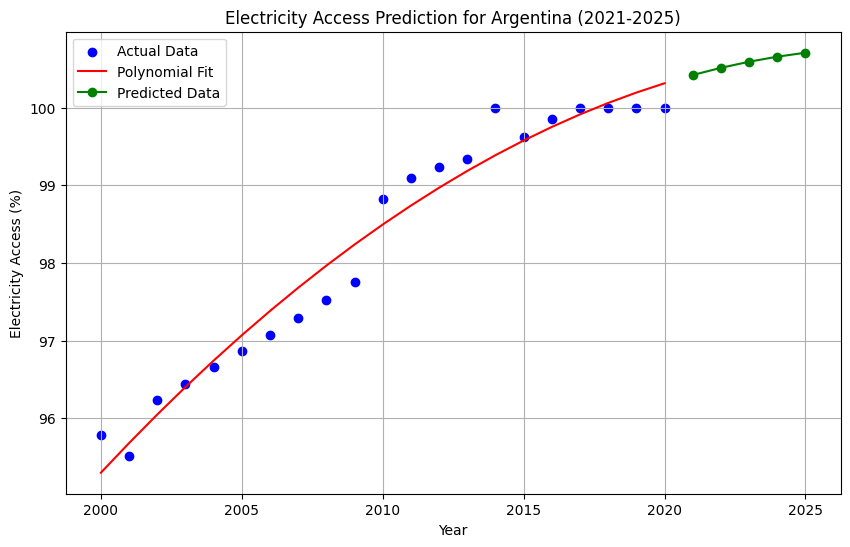

Metrics for China:
MAE: 0.11815685248800871
MSE: 0.019609236667094583
RMSE: 0.14003298421120142
R²: 0.9818612971978106
   Year  Predicted Electricity Access (%)
0  2021                         99.957853
1  2022                         99.877259
2  2023                         99.775704
3  2024                         99.653188
4  2025                         99.509710


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


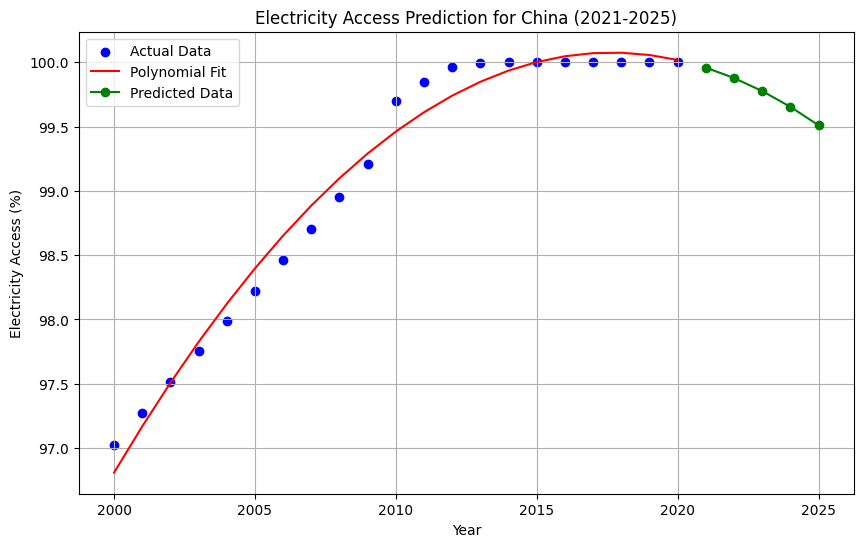

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض می‌کنیم که df از قبل بارگذاری شده است
# df = ...

# تابعی برای پیش‌بینی و نمایش نتایج برای هر کشور
def predict_electricity_access(country):
    # انتخاب داده‌های کشور مورد نظر
    country_data = df[df['Entity'] == country]

    # انتخاب ستون سال و دسترسی به برق
    X = country_data[['Year']]
    y = country_data['Electricity Access (%)']

    # تبدیل ویژگی‌ها به ویژگی‌های چندجمله‌ای
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # آموزش مدل رگرسیون چندجمله‌ای
    model = LinearRegression()
    model.fit(X_poly, y)

    # پیش‌بینی مقادیر
    y_pred = model.predict(X_poly)

    # محاسبه معیارهای ارزیابی مدل
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # ایجاد داده‌های پیش‌بینی برای سال‌های 2021 تا 2025
    future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)

    # نمایش نتایج به صورت جدول
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Electricity Access (%)': future_predictions
    })

    # نمایش جدول
    print(future_results)

    # نمایش نتایج به صورت نمودار
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Polynomial Fit')
    plt.plot(future_results['Year'], future_results['Predicted Electricity Access (%)'], color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Electricity Access (%)')
    plt.title(f'Electricity Access Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# پیش‌بینی برای افغانستان
predict_electricity_access('Afghanistan')

# پیش‌بینی برای آرژانتین
predict_electricity_access('Argentina')

# پیش‌بینی برای چین
predict_electricity_access('China')


Metrics for Afghanistan:
MAE: 4.369784908817029
MSE: 45.95155977154885
RMSE: 6.778757981485167
R²: 0.9588313131505684
   Year  Predicted Electricity Access (%)
0  2021                        112.286009
1  2022                        117.780603
2  2023                        123.283201
3  2024                        128.793804
4  2025                        134.312410


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


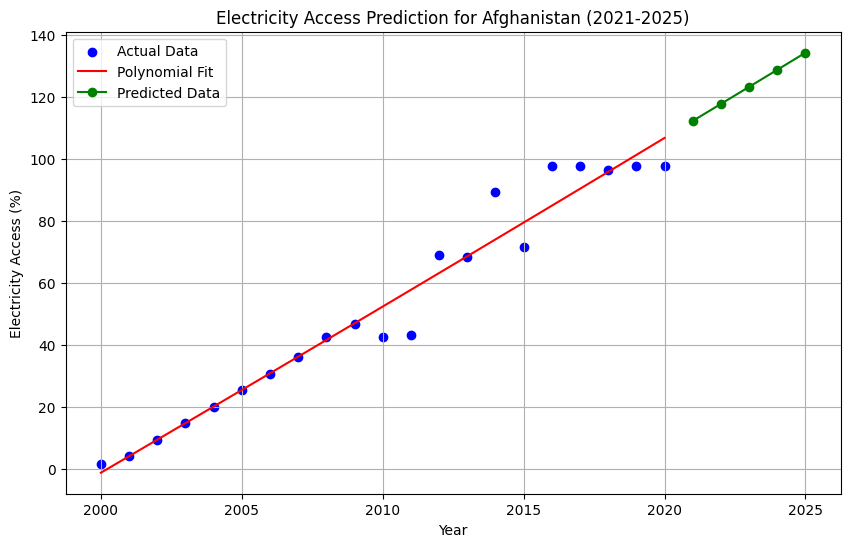

Metrics for Argentina:
MAE: 0.2535101657668873
MSE: 0.09006746474184688
RMSE: 0.3001124201725861
R²: 0.9632080201593641
   Year  Predicted Electricity Access (%)
0  2021                        100.420182
1  2022                        100.512658
2  2023                        100.591363
3  2024                        100.656296
4  2025                        100.707458


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


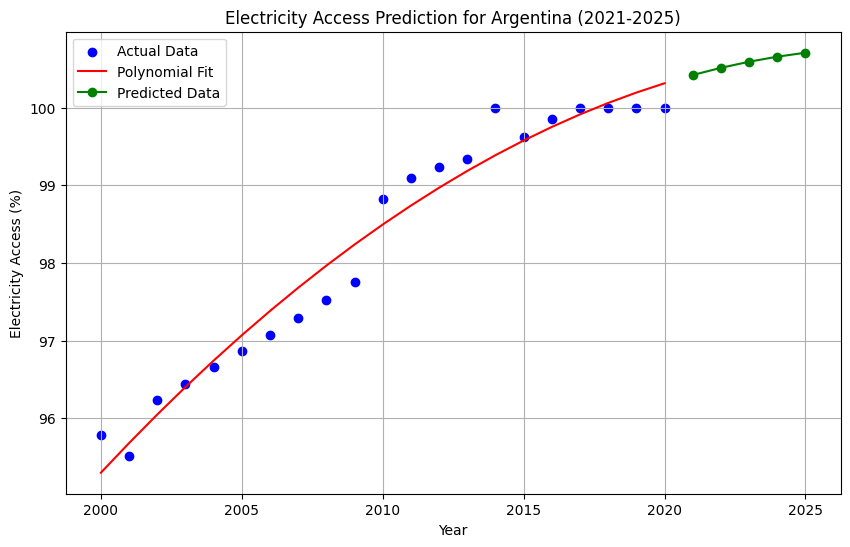

Metrics for China:
MAE: 0.11815685248800871
MSE: 0.019609236667094583
RMSE: 0.14003298421120142
R²: 0.9818612971978106
   Year  Predicted Electricity Access (%)
0  2021                         99.957853
1  2022                         99.877259
2  2023                         99.775704
3  2024                         99.653188
4  2025                         99.509710


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


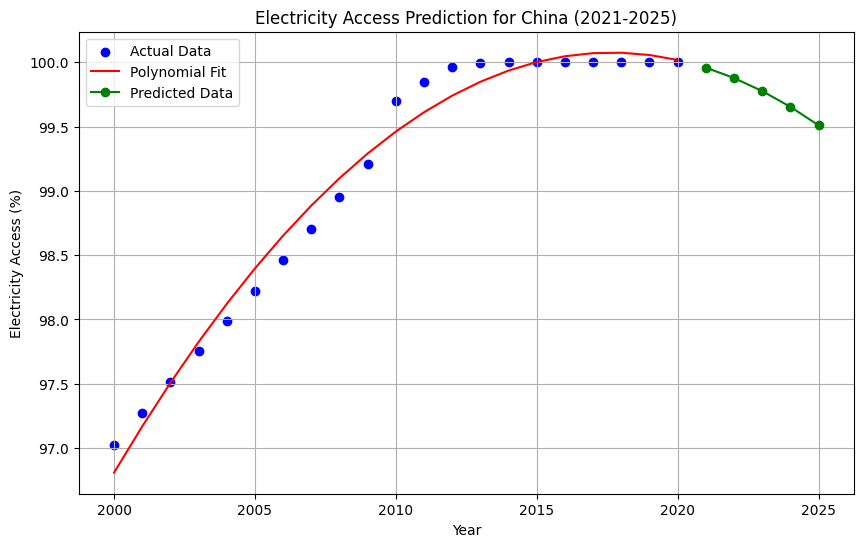

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_electricity_access(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select Year and Electricity Access columns
    X = country_data[['Year']]
    y = country_data['Electricity Access (%)']

    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict values
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    # Create prediction data for years 2021 to 2025
    future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)
    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Electricity Access (%)': future_predictions
    })
    # Display the table
    print(future_results)
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Polynomial Fit')
    plt.plot(future_results['Year'], future_results['Predicted Electricity Access (%)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Electricity Access (%)')
    plt.title(f'Electricity Access Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()
# Predictions for Afghanistan
predict_electricity_access('Afghanistan')

# Predictions for Argentina
predict_electricity_access('Argentina')

# Predictions for China
predict_electricity_access('China')


Metrics for Afghanistan:
MAE: 2.973239251678854
MSE: 14.165725589461804
RMSE: 3.763738246672024
R²: 0.8742605817563633
   Year  Predicted Renewable Energy Share (%)
0  2021                             24.939071
1  2022                             27.461084
2  2023                             30.320847
3  2024                             33.518360
4  2025                             37.053623


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


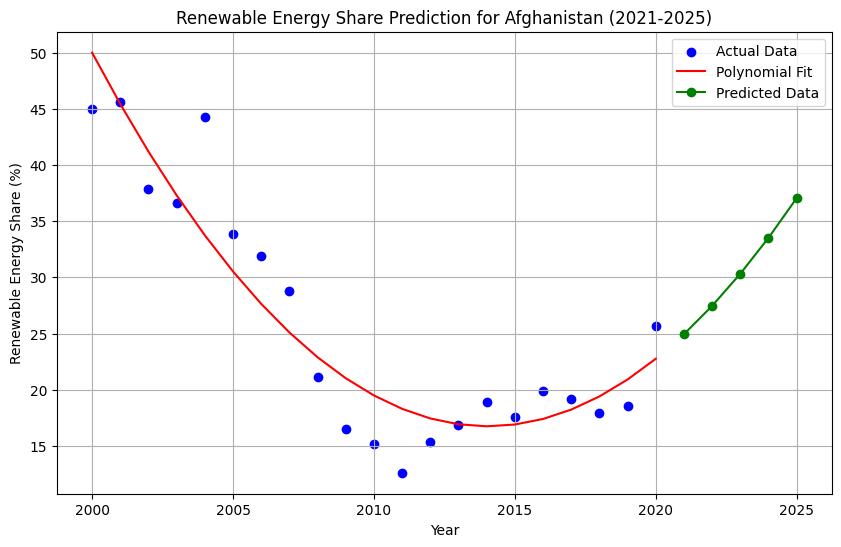

Metrics for Argentina:
MAE: 0.5552593751514963
MSE: 0.5283211430416134
RMSE: 0.7268570306749557
R²: 0.5268341143683097
   Year  Predicted Renewable Energy Share (%)
0  2021                             11.314440
1  2022                             11.829839
2  2023                             12.391666
3  2024                             12.999922
4  2025                             13.654606


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


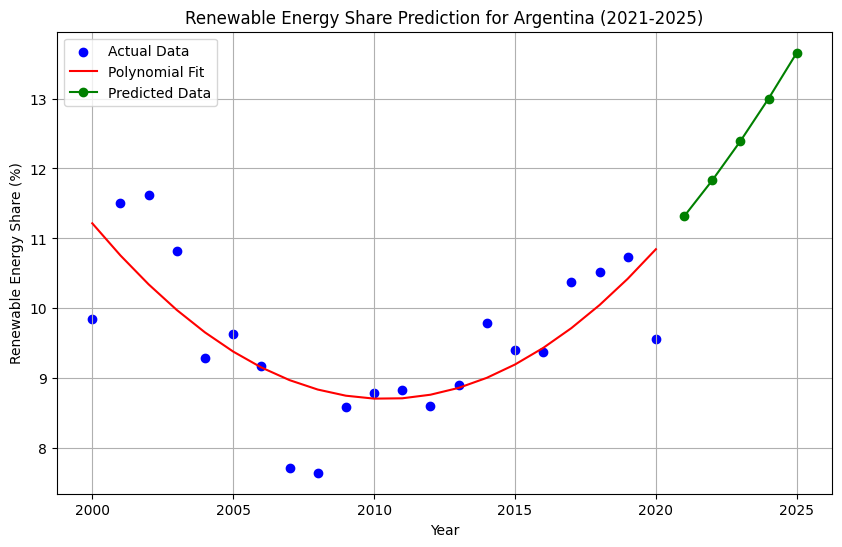

Metrics for China:
MAE: 0.5355326402305978
MSE: 0.4693692828082864
RMSE: 0.6851053078237581
R²: 0.9855597338190425
   Year  Predicted Renewable Energy Share (%)
0  2021                             18.232034
1  2022                             20.122959
2  2023                             22.239899
3  2024                             24.582855
4  2025                             27.151826


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


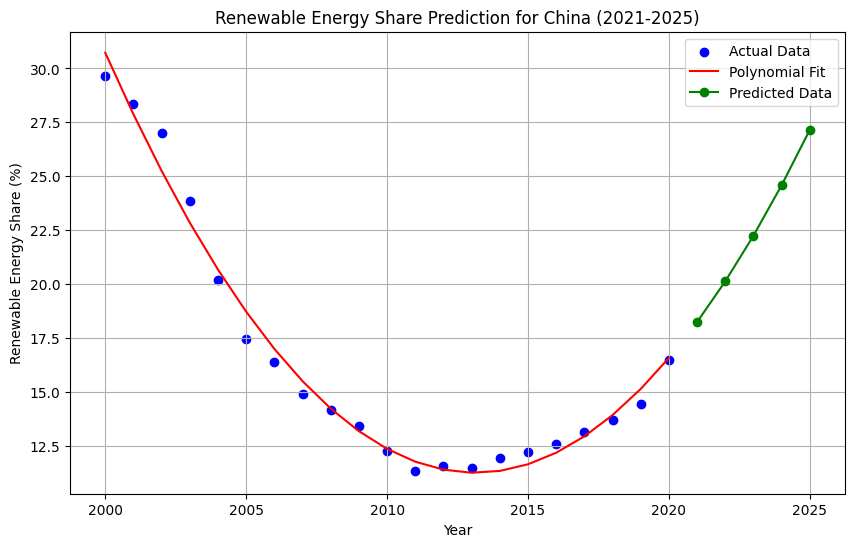

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_renewable_energy_share(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select Year and Renewable Energy Share columns
    X = country_data[['Year']]
    y = country_data['Renewable Energy Share (%)']

    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict values
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    # Create prediction data for years 2021 to 2025
    future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)
    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Renewable Energy Share (%)': future_predictions
    })
    # Display the table
    print(future_results)
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Polynomial Fit')
    plt.plot(future_results['Year'], future_results['Predicted Renewable Energy Share (%)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Renewable Energy Share (%)')
    plt.title(f'Renewable Energy Share Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()
# Predictions for Afghanistan
predict_renewable_energy_share('Afghanistan')

# Predictions for Argentina
predict_renewable_energy_share('Argentina')

# Predictions for China
predict_renewable_energy_share('China')


Metrics for Afghanistan:
MAE: 0.24558015925705523
MSE: 0.0840172875120214
RMSE: 0.2898573571811166
R²: 0.674998243113103
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                       2.777010
1  2022                                       3.021556
2  2023                                       3.310879
3  2024                                       3.644979
4  2025                                       4.023856


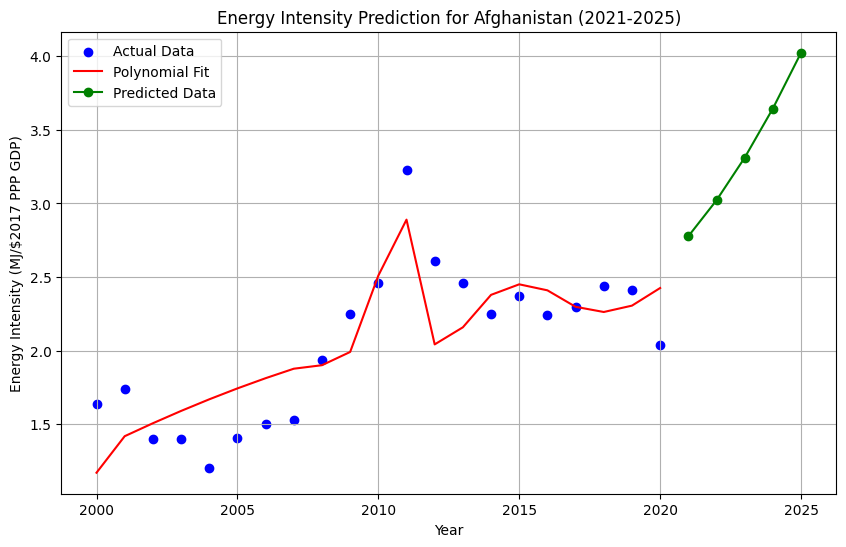

Metrics for Argentina:
MAE: 0.11313499803334885
MSE: 0.02082164995290195
RMSE: 0.14429708920453646
R²: 0.6453086337645224
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                      -3.267308
1  2022                                      -1.401249
2  2023                                       0.179834
3  2024                                       1.475941
4  2025                                       2.487072


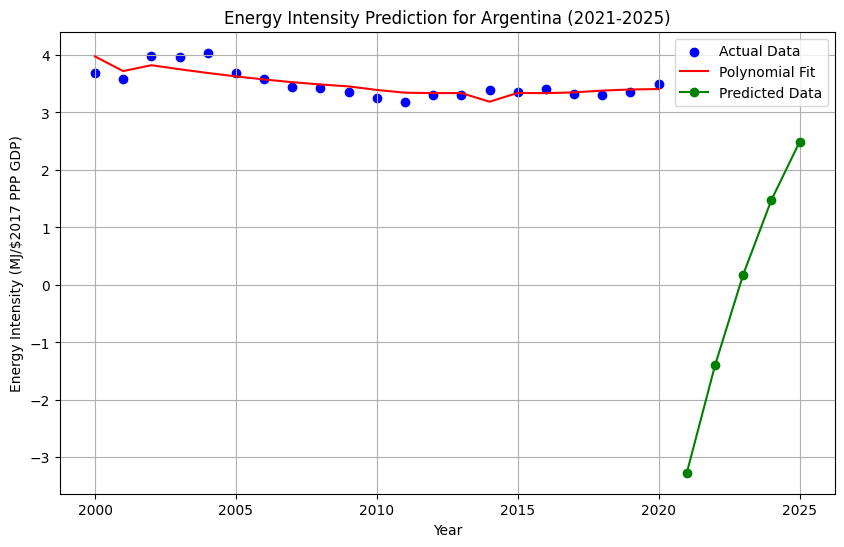

Metrics for China:
MAE: 0.3179396393704008
MSE: 0.15602078058400412
RMSE: 0.3949946589309837
R²: 0.9329690481969555
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                     622.115118
1  2022                                     450.825381
2  2023                                     304.631271
3  2024                                     183.532786
4  2025                                      87.529928


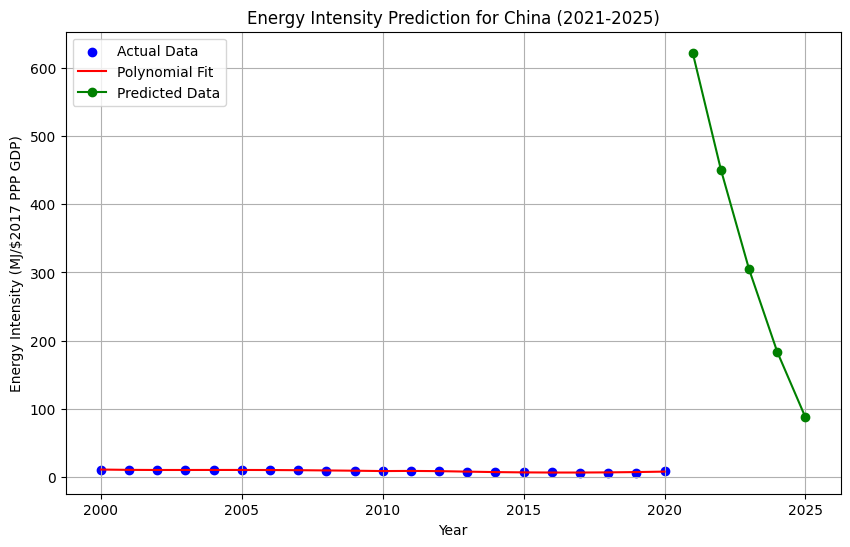

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_energy_intensity(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select relevant features and the target variable
    selected_features = ['Year', 'Electricity Access (%)']  # Add other selected features if needed
    X = country_data[selected_features]
    y = country_data['Energy Intensity (MJ/$2017 PPP GDP)']

    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict values
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Create prediction data for years 2021 to 2025
    future_years = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Electricity Access (%)': [95, 96, 97, 98, 99]  # Example future values for Electricity Access (%)
    })
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)

    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Energy Intensity (MJ/$2017 PPP GDP)': future_predictions
    })

    # Display the table
    print(future_results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X['Year'], y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Polynomial Fit')
    plt.plot(future_results['Year'], future_results['Predicted Energy Intensity (MJ/$2017 PPP GDP)'], color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
    plt.title(f'Energy Intensity Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_energy_intensity('Afghanistan')

# Predictions for Argentina
predict_energy_intensity('Argentina')

# Predictions for China
predict_energy_intensity('China')


Metrics for Afghanistan:
MAE: 0.24558015925705523
MSE: 0.0840172875120214
RMSE: 0.2898573571811166
R²: 0.674998243113103
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                       2.777010
1  2022                                       3.021556
2  2023                                       3.310879
3  2024                                       3.644979
4  2025                                       4.023856


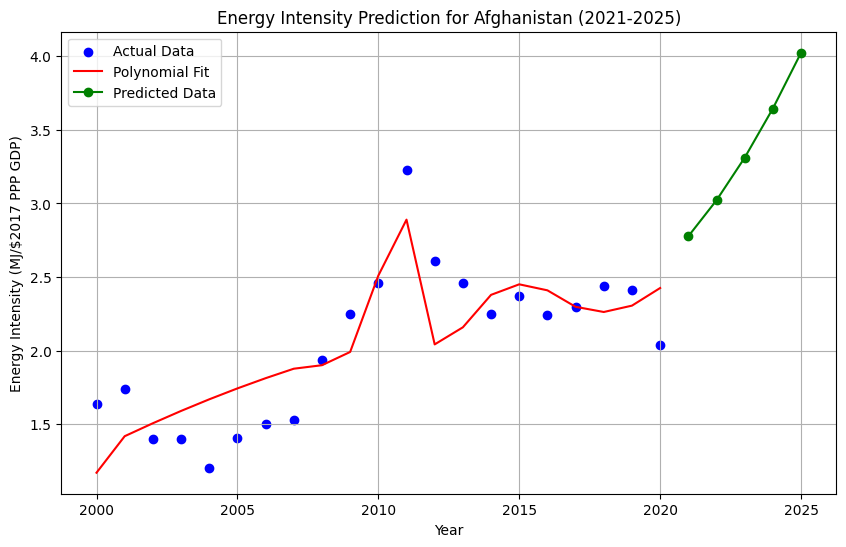

Metrics for Argentina:
MAE: 0.11313499803334885
MSE: 0.02082164995290195
RMSE: 0.14429708920453646
R²: 0.6453086337645224
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                      -3.267308
1  2022                                      -1.401249
2  2023                                       0.179834
3  2024                                       1.475941
4  2025                                       2.487072


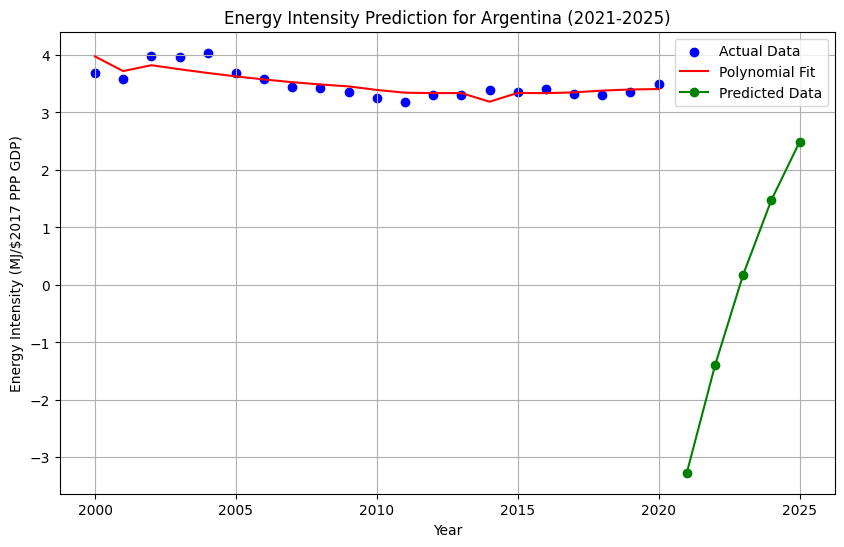

Metrics for China:
MAE: 0.3179396393704008
MSE: 0.15602078058400412
RMSE: 0.3949946589309837
R²: 0.9329690481969555
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                     622.115118
1  2022                                     450.825381
2  2023                                     304.631271
3  2024                                     183.532786
4  2025                                      87.529928


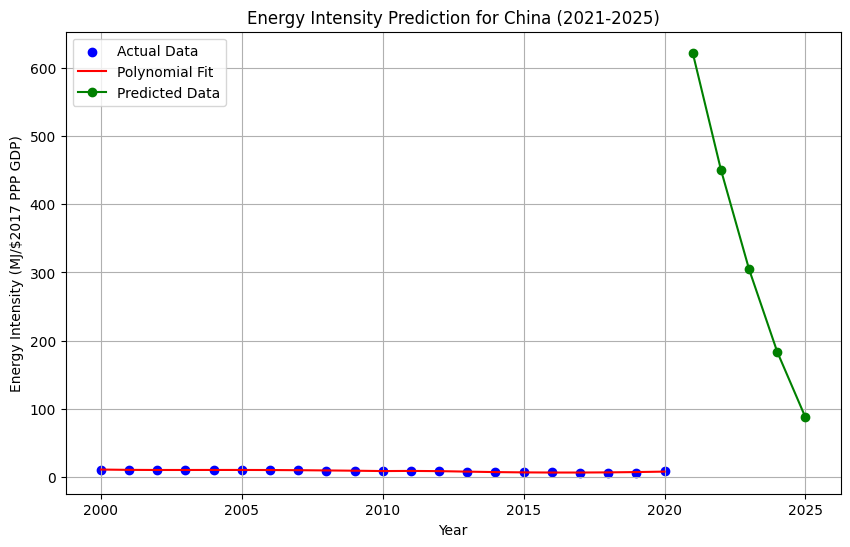

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_energy_intensity(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select relevant features and the target variable
    selected_features = ['Year', 'Electricity Access (%)']  # Add other selected features if needed
    X = country_data[selected_features]
    y = country_data['Energy Intensity (MJ/$2017 PPP GDP)']

    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict values
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Create prediction data for years 2021 to 2025
    future_data = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Electricity Access (%)': [95, 96, 97, 98, 99]  # Example future values for Electricity Access (%)
    })
    future_years_poly = poly.transform(future_data)
    future_predictions = model.predict(future_years_poly)

    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Energy Intensity (MJ/$2017 PPP GDP)': future_predictions
    })

    # Display the table
    print(future_results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X['Year'], y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Polynomial Fit')
    plt.plot(future_results['Year'], future_results['Predicted Energy Intensity (MJ/$2017 PPP GDP)'], color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
    plt.title(f'Energy Intensity Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_energy_intensity('Afghanistan')

# Predictions for Argentina
predict_energy_intensity('Argentina')

# Predictions for China
predict_energy_intensity('China')



Metrics for Afghanistan:
MAE: 0.26361054244435006
MSE: 0.11827563955059742
RMSE: 0.3439122555981357
R²: 0.5424776044410448
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                       2.284910
1  2022                                       2.238236
2  2023                                       2.182558
3  2024                                       2.117876
4  2025                                       2.044191


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


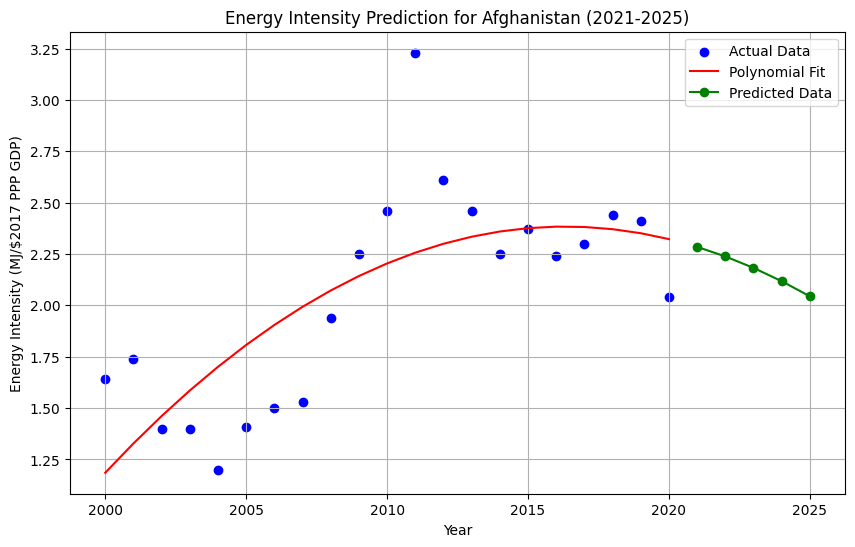

Metrics for Argentina:
MAE: 0.11534286025556785
MSE: 0.02326596888168446
RMSE: 0.15253186185739837
R²: 0.6036702995150182
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                       3.431936
1  2022                                       3.468536
2  2023                                       3.510686
3  2024                                       3.558388
4  2025                                       3.611642


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


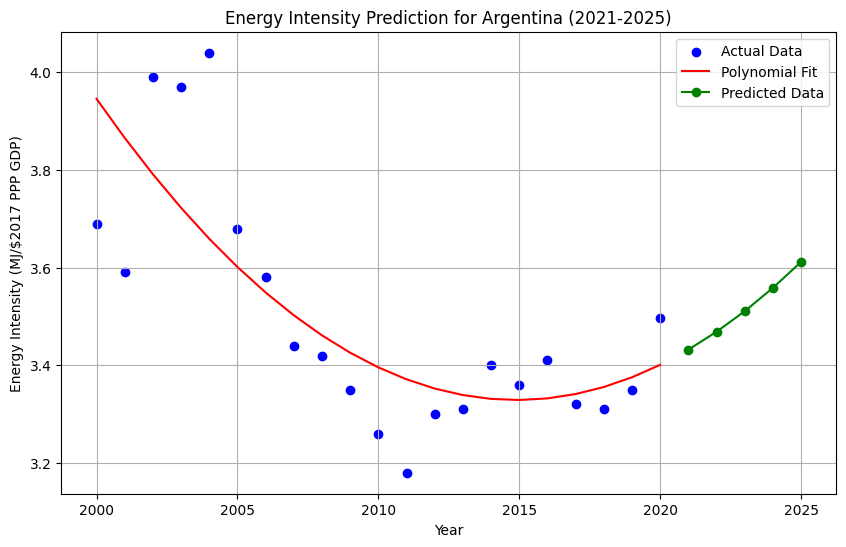

Metrics for China:
MAE: 0.48098981784975825
MSE: 0.44506553612290356
RMSE: 0.667132322798786
R²: 0.8087872244365046
   Year  Predicted Energy Intensity (MJ/$2017 PPP GDP)
0  2021                                       6.432327
1  2022                                       6.230488
2  2023                                       6.030794
3  2024                                       5.833246
4  2025                                       5.637843


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


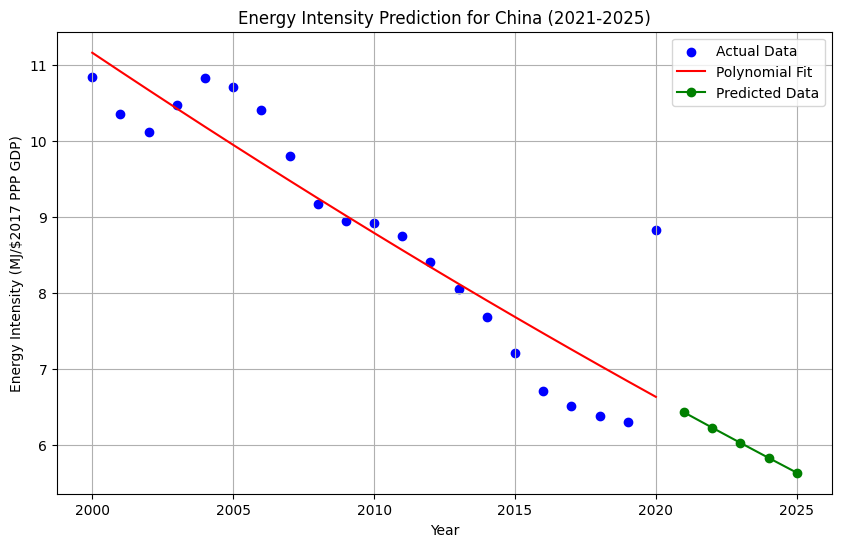

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_energy_intensity(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]
    # Select Year and Energy Intensity columns
    X = country_data[['Year']]
    y = country_data['Energy Intensity (MJ/$2017 PPP GDP)']
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    # Predict values
    y_pred = model.predict(X_poly)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    # Create prediction data for years 2021 to 2025
    future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)
    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Energy Intensity (MJ/$2017 PPP GDP)': future_predictions
    })
    # Display the table
    print(future_results)
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Polynomial Fit')
    plt.plot(future_results['Year'], future_results['Predicted Energy Intensity (MJ/$2017 PPP GDP)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
    plt.title(f'Energy Intensity Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()
# Predictions for Afghanistan
predict_energy_intensity('Afghanistan')
# Predictions for Argentina
predict_energy_intensity('Argentina')
# Predictions for China
predict_energy_intensity('China')


مدل مطلوب بی فایده1



Metrics for Afghanistan:
MAE: 1.6337989822585717
MSE: 5.593018514045713
RMSE: 2.3649563450613025
R²: 0.9999625845299951
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                         704.265983    
1  2022                                         704.265983    
2  2023                                         704.265983    
3  2024                                         704.265983    
4  2025                                         704.265983    


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


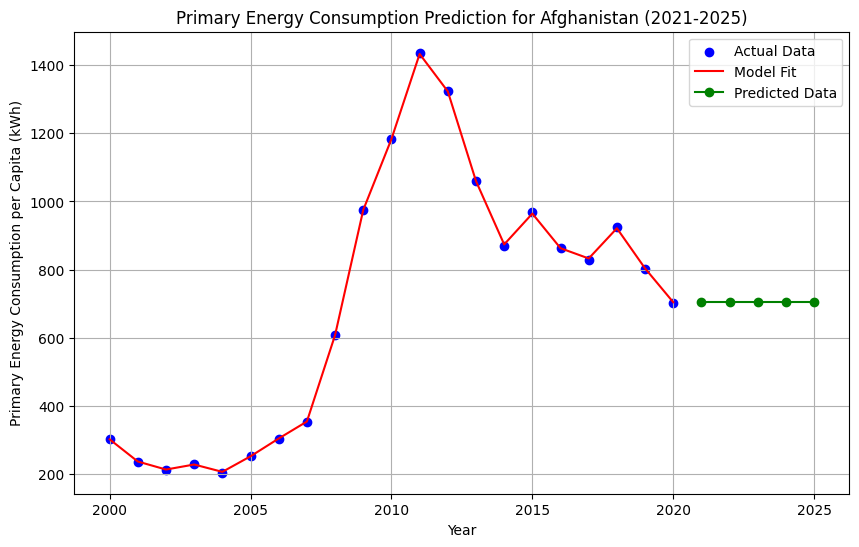

Metrics for Argentina:
MAE: 4.718978176111878
MSE: 49.752670200523404
RMSE: 7.053557272789624
R²: 0.9999834884895771
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       19317.793512    
1  2022                                       19317.793512    
2  2023                                       19317.793512    
3  2024                                       19317.793512    
4  2025                                       19317.793512    


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


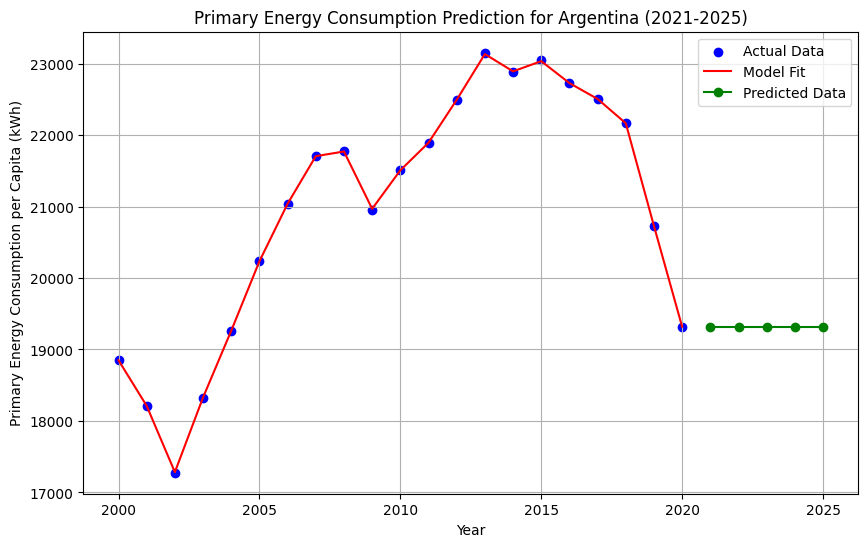

Metrics for China:
MAE: 0.3322949287577926
MSE: 0.2826161944100197
RMSE: 0.5316165859056879
R²: 0.9999999924318699
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       29132.847071    
1  2022                                       29132.847071    
2  2023                                       29132.847071    
3  2024                                       29132.847071    
4  2025                                       29132.847071    


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


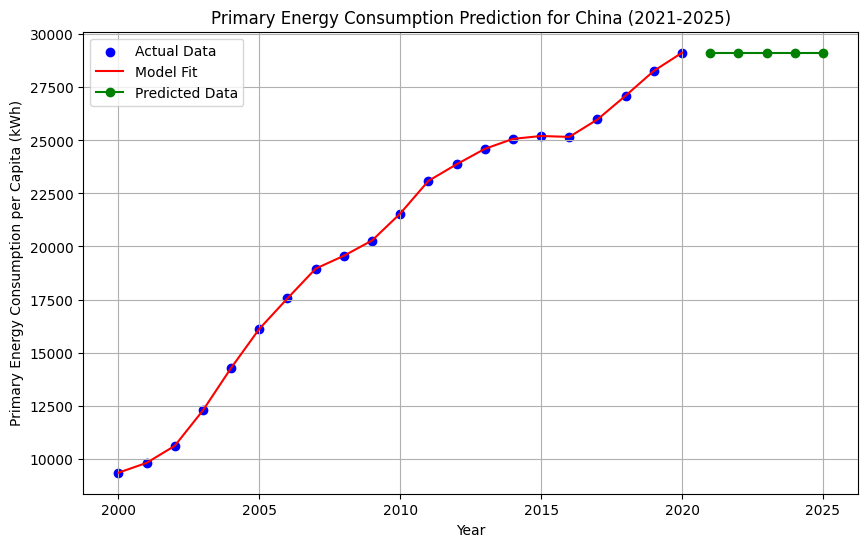

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_primary_energy_consumption(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select Year and Primary Energy Consumption columns
    X = country_data[['Year']]
    y = country_data['Primary Energy Consumption per Capita (kWh)']

    # Train the Gradient Boosting model
    model = GradientBoostingRegressor()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Create prediction data for years 2021 to 2025
    future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions
    })

    # Display the table
    print(future_results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Model Fit')
    plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Primary Energy Consumption per Capita (kWh)')
    plt.title(f'Primary Energy Consumption Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_primary_energy_consumption('Afghanistan')

# Predictions for Argentina
predict_primary_energy_consumption('Argentina')

# Predictions for China
predict_primary_energy_consumption('China')


مدل مطلوب بی فایده2



Metrics for Afghanistan:
MAE: 253.17428232285852
MSE: 107221.09051502212
RMSE: 327.4463169971868
R²: 0.9831318940161895
   Year  Predicted CO2 Emissions (kt)
0  2021                   4813.900018
1  2022                   4813.900018
2  2023                   4813.900018
3  2024                   4813.900018
4  2025                   4813.900018


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


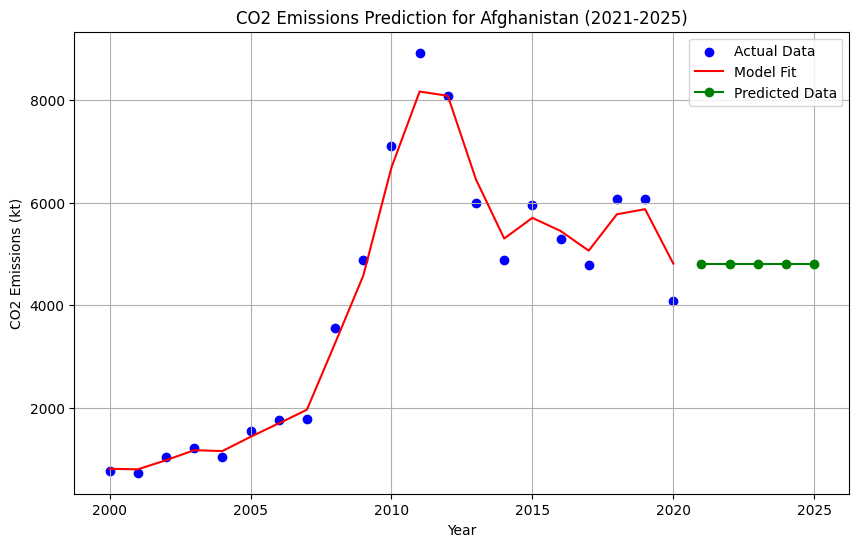

Metrics for Argentina:
MAE: 1985.1395173000408
MSE: 5622262.880720222
RMSE: 2371.1311395028793
R²: 0.9868185982135446
   Year  Predicted CO2 Emissions (kt)
0  2021                 165897.982407
1  2022                 165897.982407
2  2023                 165897.982407
3  2024                 165897.982407
4  2025                 165897.982407


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


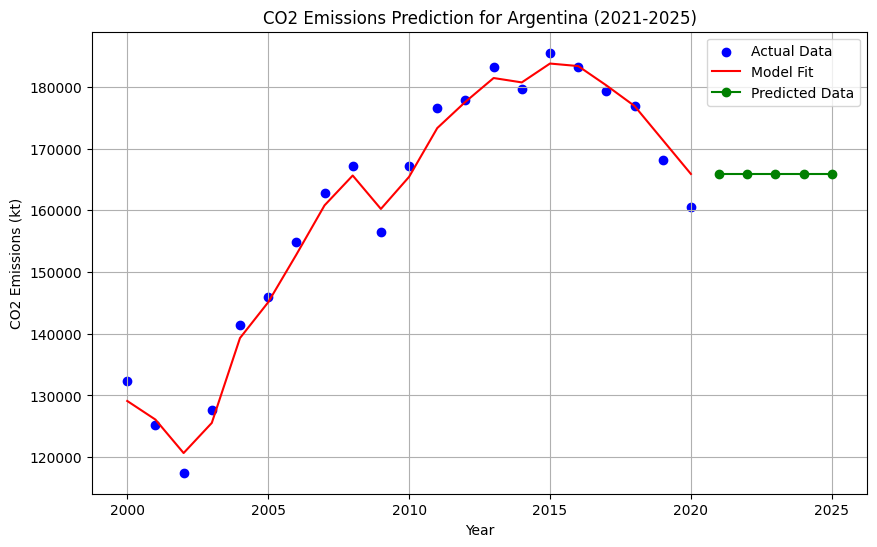

Metrics for China:
MAE: 142745.07458331014
MSE: 62295523856.37614
RMSE: 249590.7126805325
R²: 0.9894291816399173
   Year  Predicted CO2 Emissions (kt)
0  2021                  8.605072e+06
1  2022                  8.605072e+06
2  2023                  8.605072e+06
3  2024                  8.605072e+06
4  2025                  8.605072e+06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


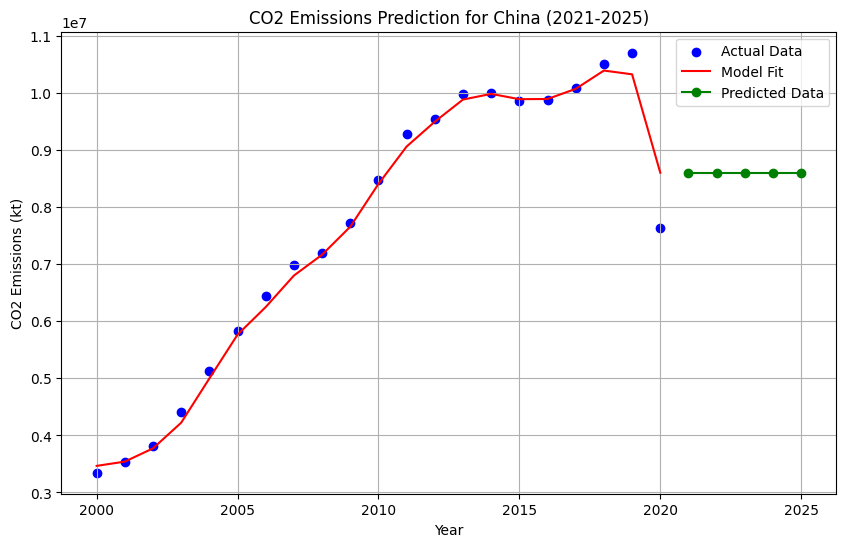

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_co2_emissions(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select Year and CO2 Emissions columns
    X = country_data[['Year']]
    y = country_data['CO2 Emissions (kt)']

    # Train the Random Forest model
    model = RandomForestRegressor()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Create prediction data for years 2021 to 2025
    future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted CO2 Emissions (kt)': future_predictions
    })

    # Display the table
    print(future_results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Model Fit')
    plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (kt)')
    plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_co2_emissions('Afghanistan')

# Predictions for Argentina
predict_co2_emissions('Argentina')

# Predictions for China
predict_co2_emissions('China')


Metrics for Afghanistan:
MAE: 185.36893978544785
MSE: 53865.915521292605
RMSE: 232.09031759488073
R²: 0.6396545905552931
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                         726.154344    
1  2022                                         648.816427    
2  2023                                         561.048432    
3  2024                                         462.850358    
4  2025                                         354.222206    


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


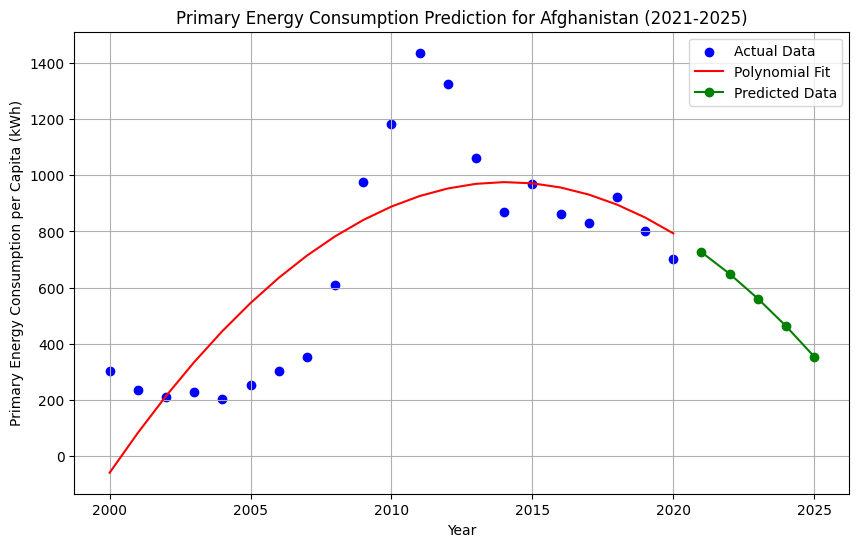

Metrics for Argentina:
MAE: 658.9446855097726
MSE: 619799.3513999382
RMSE: 787.2733651025787
R²: 0.794306046097637
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       20312.067198    
1  2022                                       19761.346971    
2  2023                                       19146.413524    
3  2024                                       18467.266857    
4  2025                                       17723.906971    


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


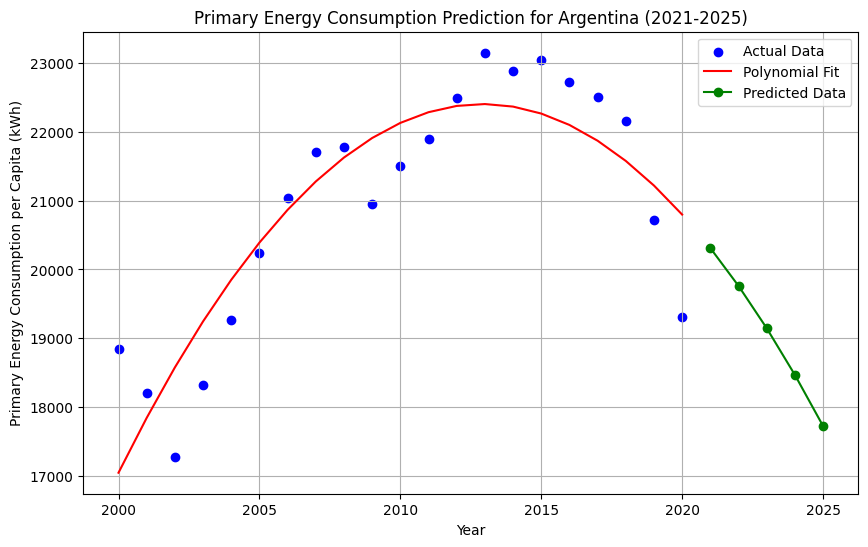

Metrics for China:
MAE: 503.8075227359024
MSE: 357344.49193581654
RMSE: 597.7829806341232
R²: 0.9904307337075169
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       28533.541377    
1  2022                                       28781.080726    
2  2023                                       28964.132568    
3  2024                                       29082.696903    
4  2025                                       29136.773731    


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


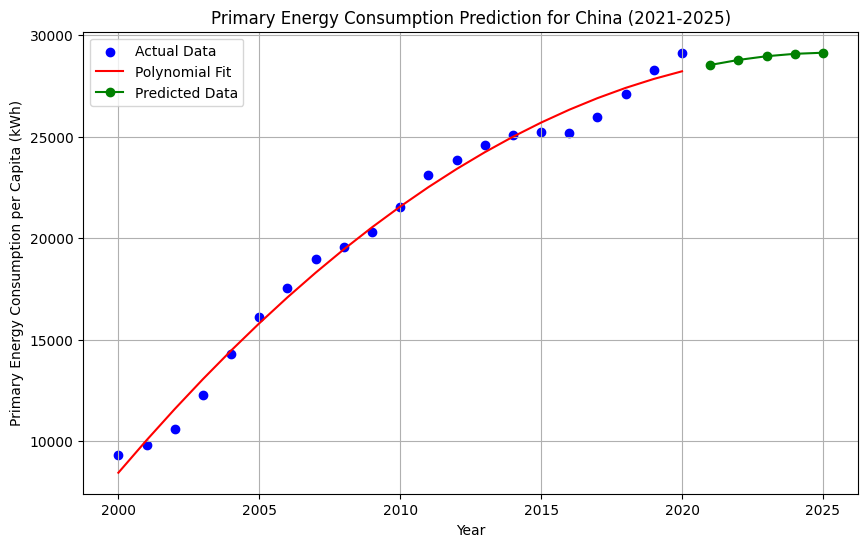

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_primary_energy_consumption(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select Year and Primary Energy Consumption columns
    X = country_data[['Year']]
    y = country_data['Primary Energy Consumption per Capita (kWh)']

    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict values
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Create prediction data for years 2021 to 2025
    future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)

    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions
    })

    # Display the table
    print(future_results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Polynomial Fit')
    plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Primary Energy Consumption per Capita (kWh)')
    plt.title(f'Primary Energy Consumption Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_primary_energy_consumption('Afghanistan')

# Predictions for Argentina
predict_primary_energy_consumption('Argentina')

# Predictions for China
predict_primary_energy_consumption('China')


Metrics for Afghanistan:
MAE: 1109.1689358592757
MSE: 1973848.0985901412
RMSE: 1404.9370443511486
R²: 0.6894726703204304
   Year  Predicted CO2 Emissions (kt)
0  2021                   4756.969983
1  2022                   4339.948795
2  2023                   3860.423222
3  2024                   3318.393266
4  2025                   2713.858927


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


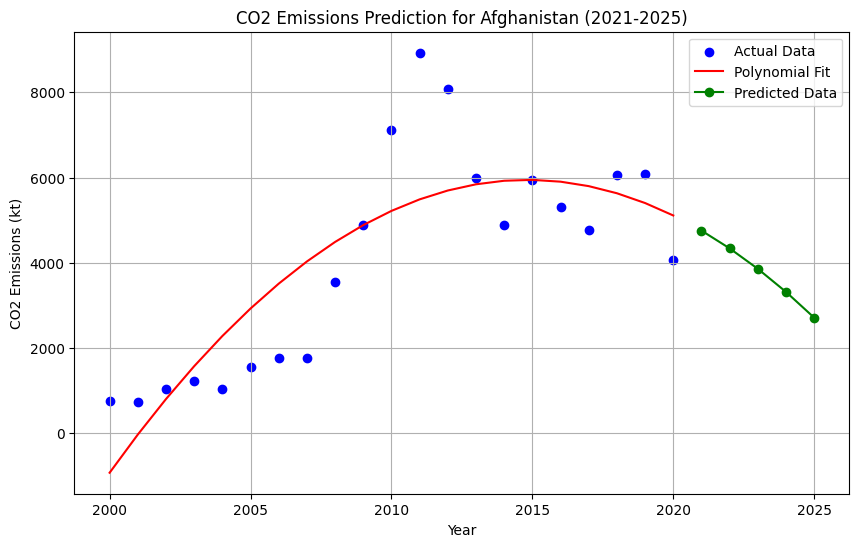

Metrics for Argentina:
MAE: 5588.832919226282
MSE: 50111041.46357839
RMSE: 7078.9152745020465
R²: 0.8825146056876414
   Year  Predicted CO2 Emissions (kt)
0  2021                 166858.679825
1  2022                 163006.682667
2  2023                 158576.401161
3  2024                 153567.835307
4  2025                 147980.985104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


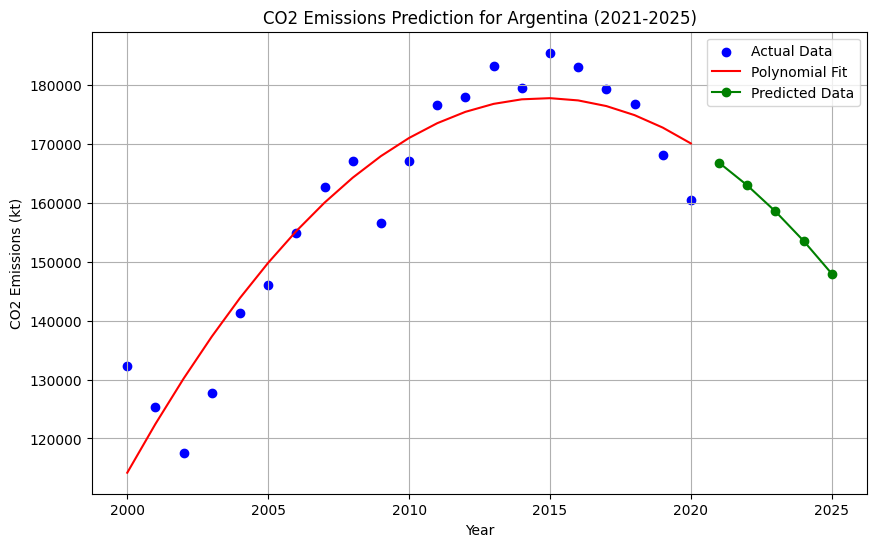

Metrics for China:
MAE: 466767.56347271305
MSE: 390823933047.93115
RMSE: 625159.1261814316
R²: 0.9336817711566618
   Year  Predicted CO2 Emissions (kt)
0  2021                  9.480673e+06
1  2022                  9.258946e+06
2  2023                  8.986431e+06
3  2024                  8.663129e+06
4  2025                  8.289041e+06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


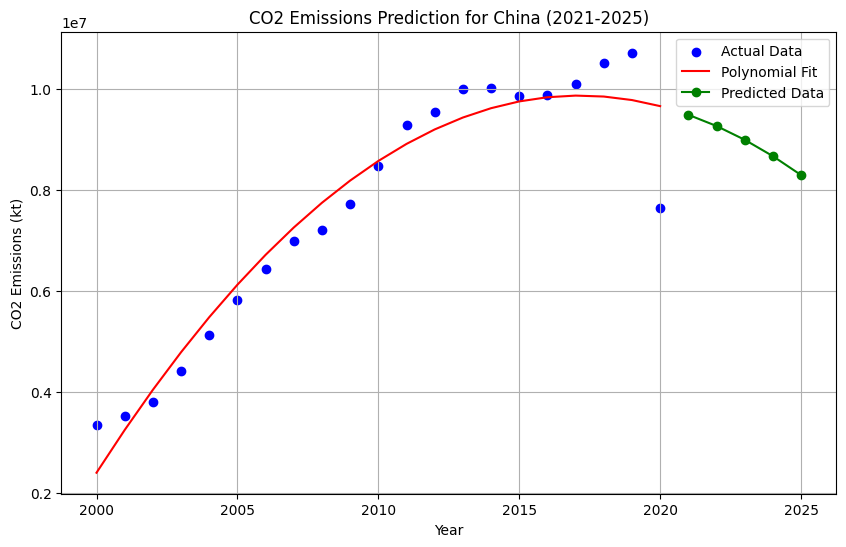

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_co2_emissions(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select Year and CO2 Emissions columns
    X = country_data[['Year']]
    y = country_data['CO2 Emissions (kt)']

    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict values
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Create prediction data for years 2021 to 2025
    future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)

    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted CO2 Emissions (kt)': future_predictions
    })

    # Display the table
    print(future_results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Polynomial Fit')
    plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (kt)')
    plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_co2_emissions('Afghanistan')

# Predictions for Argentina
predict_co2_emissions('Argentina')

# Predictions for China
predict_co2_emissions('China')


Metrics for Afghanistan:
MAE: 0.5136749460314272
MSE: 0.3935796043238982
RMSE: 0.6273592306835839
R²: 0.9999973670807913
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                         746.062893    
1  2022                                         746.062893    
2  2023                                         746.062893    
3  2024                                         746.062893    
4  2025                                         746.062893    


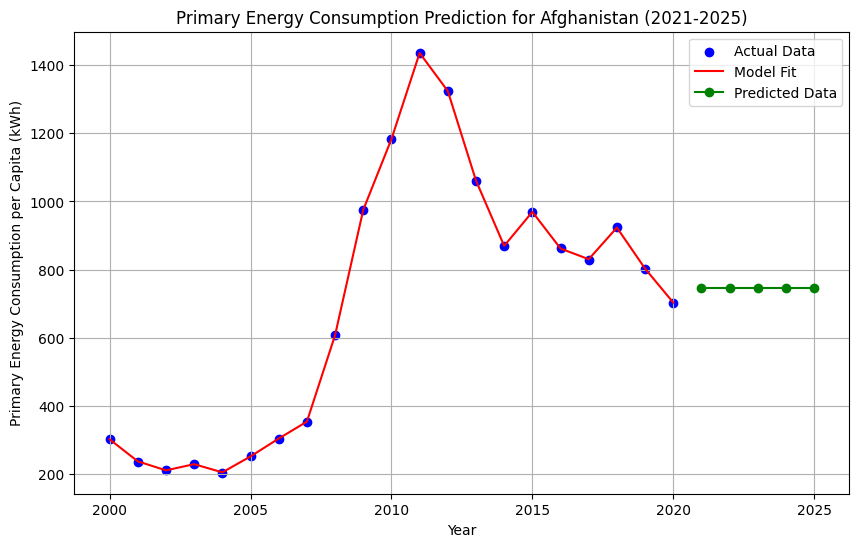

Metrics for Argentina:
MAE: 3.7337932055563128
MSE: 20.970733896792733
RMSE: 4.579381388003486
R²: 0.9999930404038634
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       19488.638838    
1  2022                                       19488.638838    
2  2023                                       19488.638838    
3  2024                                       19488.638838    
4  2025                                       19488.638838    


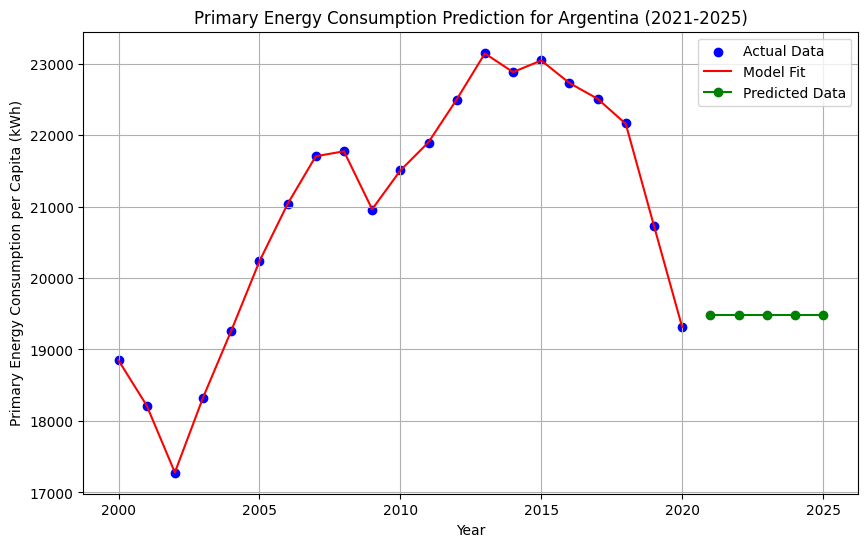

Metrics for China:
MAE: 0.3322949287577926
MSE: 0.2826161944100197
RMSE: 0.5316165859056879
R²: 0.9999999924318699
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       23332.810559    
1  2022                                       23332.810559    
2  2023                                       23332.810559    
3  2024                                       23332.810559    
4  2025                                       23332.810559    


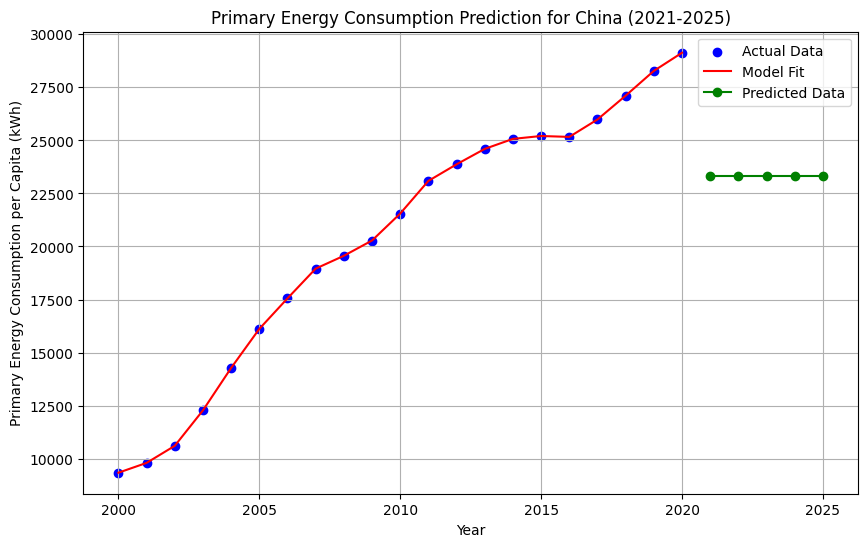

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_primary_energy_consumption(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select relevant features and the target variable
    selected_features = ['Year', 'Clean Cooking Fuels Access', 'GDP per Capita']
    X = country_data[selected_features]
    y = country_data['Primary Energy Consumption per Capita (kWh)']

    # Train the Gradient Boosting model
    model = GradientBoostingRegressor()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Create prediction data for years 2021 to 2025
    future_data = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Clean Cooking Fuels Access': [90, 91, 92, 93, 94],  # Example future values
        'GDP per Capita': [650, 680, 710, 740, 770]  # Example future values
    })
    future_predictions = model.predict(future_data)

    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions
    })

    # Display the table
    print(future_results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X['Year'], y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Model Fit')
    plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Primary Energy Consumption per Capita (kWh)')
    plt.title(f'Primary Energy Consumption Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_primary_energy_consumption('Afghanistan')

# Predictions for Argentina
predict_primary_energy_consumption('Argentina')

# Predictions for China
predict_primary_energy_consumption('China')


Metrics for Afghanistan:
MAE: 0.5136749460314272
MSE: 0.3935796043238982
RMSE: 0.6273592306835839
R²: 0.9999973670807913
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                          754.56306    
1  2022                                          754.56306    
2  2023                                          754.56306    
3  2024                                          754.56306    
4  2025                                          754.56306    


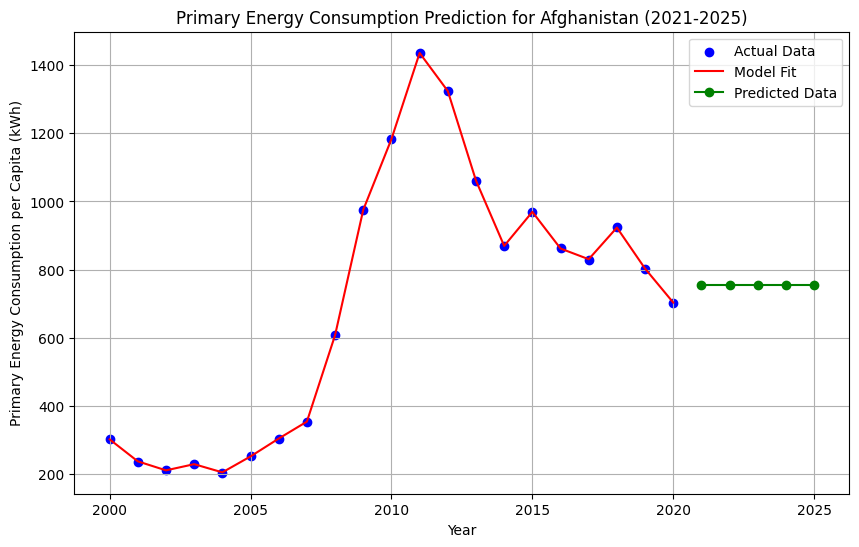

Metrics for Argentina:
MAE: 3.7337932055563128
MSE: 20.970733896792733
RMSE: 4.579381388003486
R²: 0.9999930404038634
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       19127.008381    
1  2022                                       19127.008381    
2  2023                                       19127.008381    
3  2024                                       19127.008381    
4  2025                                       19127.008381    


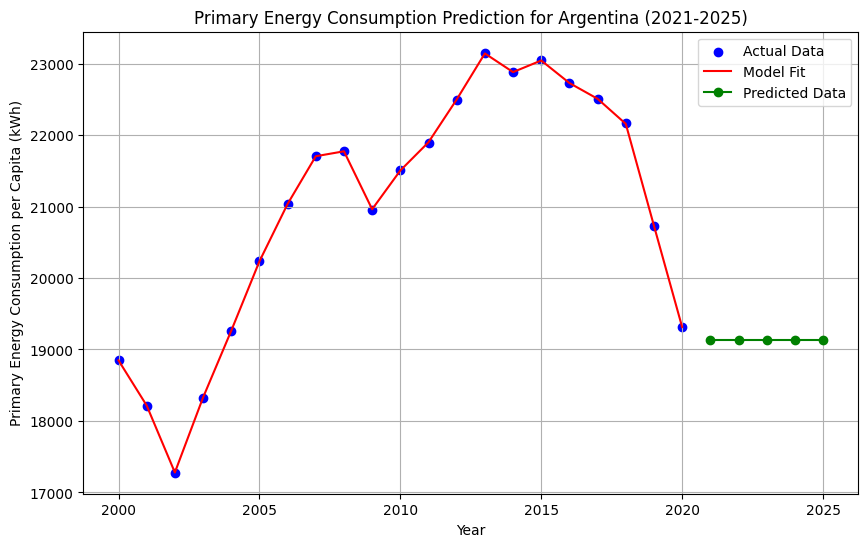

Metrics for China:
MAE: 0.3322949287577926
MSE: 0.2826161944100197
RMSE: 0.5316165859056879
R²: 0.9999999924318699
   Year  Predicted Primary Energy Consumption per Capita (kWh)
0  2021                                       22473.277448    
1  2022                                       22473.277448    
2  2023                                       22473.277448    
3  2024                                       22473.277448    
4  2025                                       22473.277448    


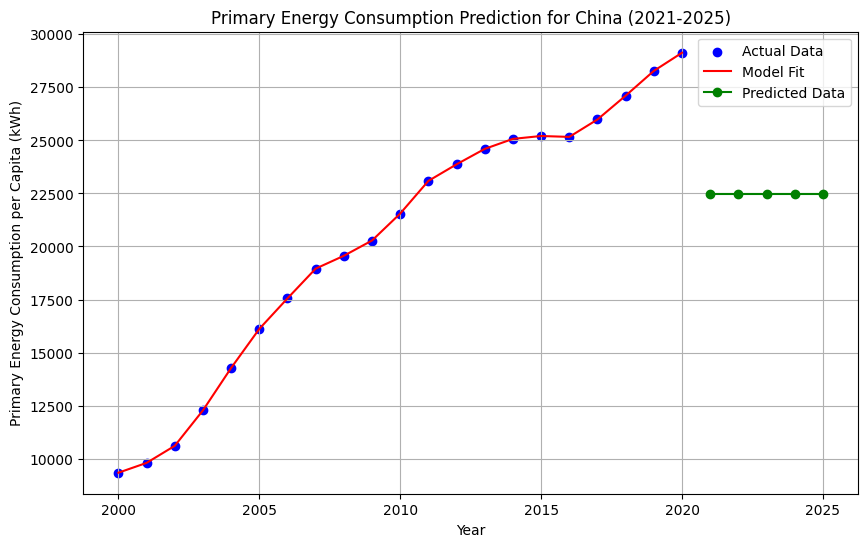

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_primary_energy_consumption(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select relevant features and the target variable
    selected_features = ['Year', 'Clean Cooking Fuels Access', 'GDP per Capita']
    X = country_data[selected_features]
    y = country_data['Primary Energy Consumption per Capita (kWh)']

    # Scale the features
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    # Train the Gradient Boosting model
    model = GradientBoostingRegressor()
    model.fit(X_scaled, y)

    # Predict values
    y_pred = model.predict(X_scaled)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    # Create prediction data for years 2021 to 2025
    future_data = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Clean Cooking Fuels Access': [90, 91, 92, 93, 94],  # Example future values
        'GDP per Capita': [650, 680, 710, 740, 770]  # Example future values
    })
    future_data_scaled = scaler_X.transform(future_data)
    future_predictions = model.predict(future_data_scaled)
    # Display results in a table
    future_results = pd.DataFrame({
        'Year': [2021, 2022, 2023, 2024, 2025],
        'Predicted Primary Energy Consumption per Capita (kWh)': future_predictions
    })
    # Display the table
    print(future_results)
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X['Year'], y, color='blue', label='Actual Data')
    plt.plot(X['Year'], y_pred, color='red', label='Model Fit')
    plt.plot(future_results['Year'], future_results['Predicted Primary Energy Consumption per Capita (kWh)'],
             color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('Primary Energy Consumption per Capita (kWh)')
    plt.title(f'Primary Energy Consumption Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_primary_energy_consumption('Afghanistan')

# Predictions for Argentina
predict_primary_energy_consumption('Argentina')

# Predictions for China
predict_primary_energy_consumption('China')


<ipython-input-6-540e892d9c94>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
<ipython-input-6-540e892d9c94>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(method='ffill', inplace=True)


Metrics for Afghanistan:
MAE: 1303.1318976280006
MSE: 2147385.273977685
RMSE: 1465.3959444388008
R²: 0.5170794744930456
   Year  Predicted CO2 Emissions (kt)
0  2021                   4820.999975
1  2022                   4820.999975
2  2023                   4820.999975
3  2024                   4820.999975
4  2025                   4820.999975


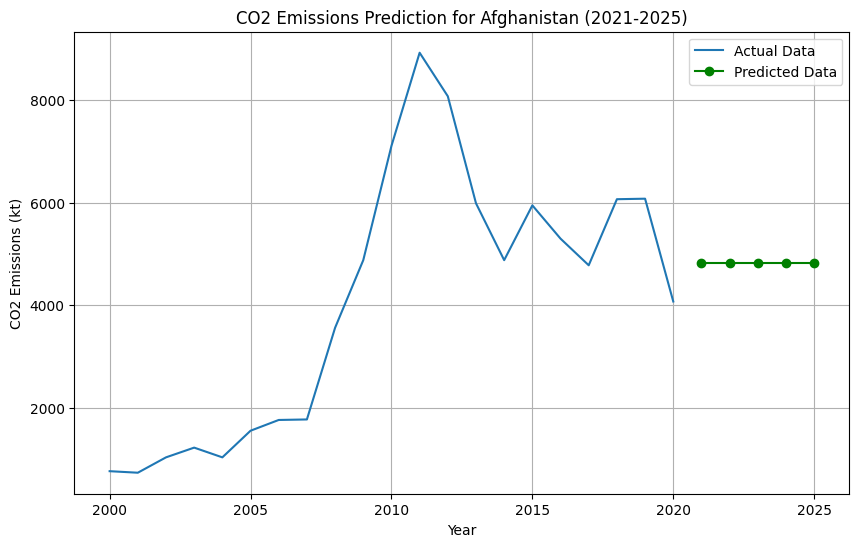

<ipython-input-6-540e892d9c94>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
<ipython-input-6-540e892d9c94>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(method='ffill', inplace=True)


Metrics for Argentina:
MAE: 2777.6289518100266
MSE: 21268478.640854985
RMSE: 4611.776083121879
R²: 0.9649341840334625
   Year  Predicted CO2 Emissions (kt)
0  2021                 169633.141711
1  2022                 169633.141711
2  2023                 169633.141711
3  2024                 169633.141711
4  2025                 169633.141711


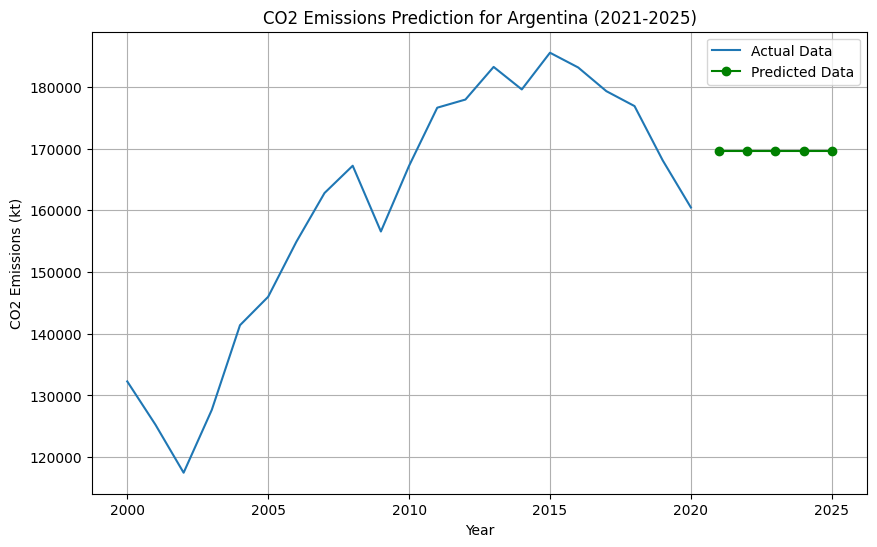

<ipython-input-6-540e892d9c94>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
<ipython-input-6-540e892d9c94>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(method='ffill', inplace=True)


Metrics for China:
MAE: 442679.73408799677
MSE: 307899627887.3917
RMSE: 554887.0406554758
R²: 0.9642134098876124
   Year  Predicted CO2 Emissions (kt)
0  2021                  4.678458e+06
1  2022                  4.904094e+06
2  2023                  5.018069e+06
3  2024                  5.260376e+06
4  2025                  5.554247e+06


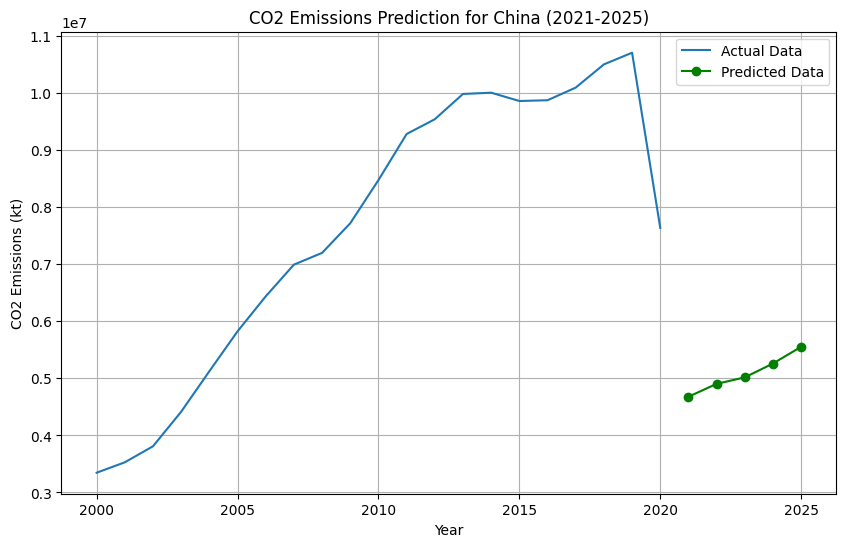

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_co2_emissions(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]
    # Select relevant features and the target variable
    selected_features = ['Electricity from Fossil Fuels (TWh)', 'Electricity from Renewables (TWh)', 'Electricity from Nuclear (TWh)']
    X = country_data[selected_features]
    y = country_data['CO2 Emissions (kt)']
    # Handle missing values if any
    X.fillna(method='ffill', inplace=True)
    y.fillna(method='ffill', inplace=True)
    # Scale the features
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    # Predict values
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    # Create prediction data for years 2021 to 2025
    future_data = pd.DataFrame({
        'Electricity from Fossil Fuels (TWh)': [1000, 1050, 1100, 1150, 1200],  # Example future values
        'Electricity from Renewables (TWh)': [200, 220, 240, 260, 280],  # Example future values
        'Electricity from Nuclear (TWh)': [50, 55, 60, 65, 70]  # Example future values
    })
    future_data_scaled = scaler_X.transform(future_data)
    future_predictions = model.predict(future_data_scaled)

    # Display results in a table
    future_years = [2021, 2022, 2023, 2024, 2025]
    future_results = pd.DataFrame({
        'Year': future_years,
        'Predicted CO2 Emissions (kt)': future_predictions
    })
    # Display the table
    print(future_results)
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['CO2 Emissions (kt)'], label='Actual Data')
    plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], color='green',
             marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (kt)')
    plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()
# Predictions for Afghanistan
predict_co2_emissions('Afghanistan')

# Predictions for Argentina
predict_co2_emissions('Argentina')

# Predictions for China
predict_co2_emissions('China')


Fitting 3 folds for each of 100 candidates, totalling 300 fits


<ipython-input-7-3e2f9f6a97a4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
<ipython-input-7-3e2f9f6a97a4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(method='ffill', inplace=True)


Best Parameters for Afghanistan: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Metrics for Afghanistan:
MAE: 1345.2572544519553
MSE: 2849995.556751017
RMSE: 1688.192985636126
R²: 0.35907106720105564
   Year  Predicted CO2 Emissions (kt)
0  2021                   3860.569737
1  2022                   3860.569737
2  2023                   3860.569737
3  2024                   3860.569737
4  2025                   3860.569737


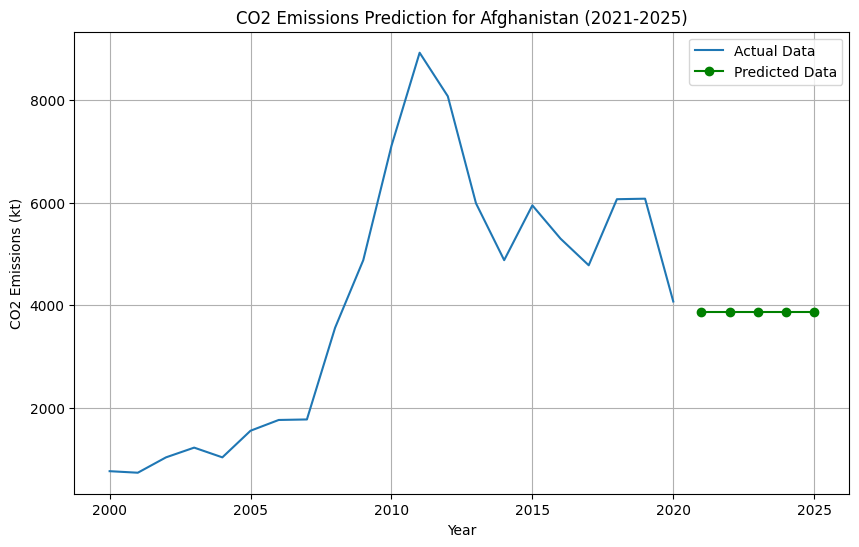

<ipython-input-7-3e2f9f6a97a4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
<ipython-input-7-3e2f9f6a97a4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(method='ffill', inplace=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters for Argentina: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Metrics for Argentina:
MAE: 3366.5960280621484
MSE: 24353671.17188406
RMSE: 4934.943887409872
R²: 0.9598475581707839
   Year  Predicted CO2 Emissions (kt)
0  2021                 168460.378105
1  2022                 168460.378105
2  2023                 168460.378105
3  2024                 168460.378105
4  2025                 168460.378105


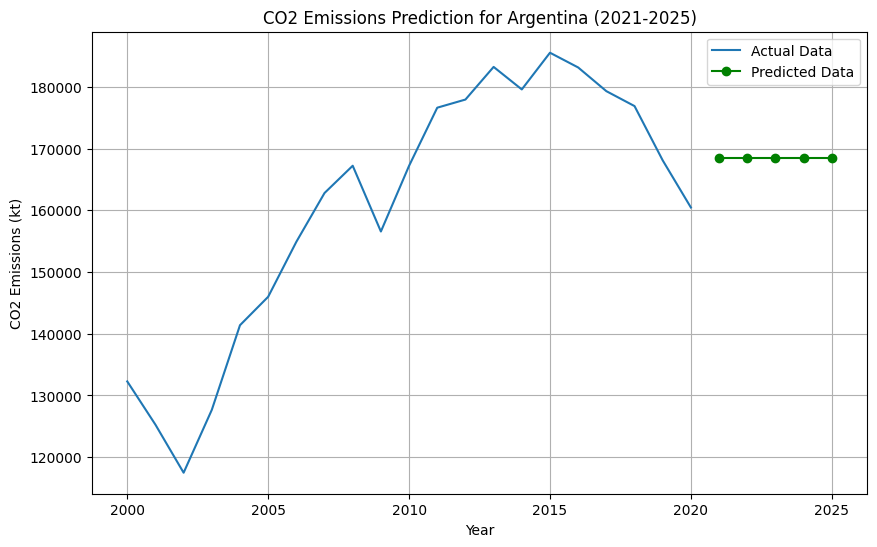

<ipython-input-7-3e2f9f6a97a4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)
<ipython-input-7-3e2f9f6a97a4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(method='ffill', inplace=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters for China: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}
Metrics for China:
MAE: 522495.06627333385
MSE: 444658623445.46155
RMSE: 666827.2815695693
R²: 0.9483181710664456
   Year  Predicted CO2 Emissions (kt)
0  2021                  4.450263e+06
1  2022                  5.119439e+06
2  2023                  5.119439e+06
3  2024                  5.119439e+06
4  2025                  6.159615e+06


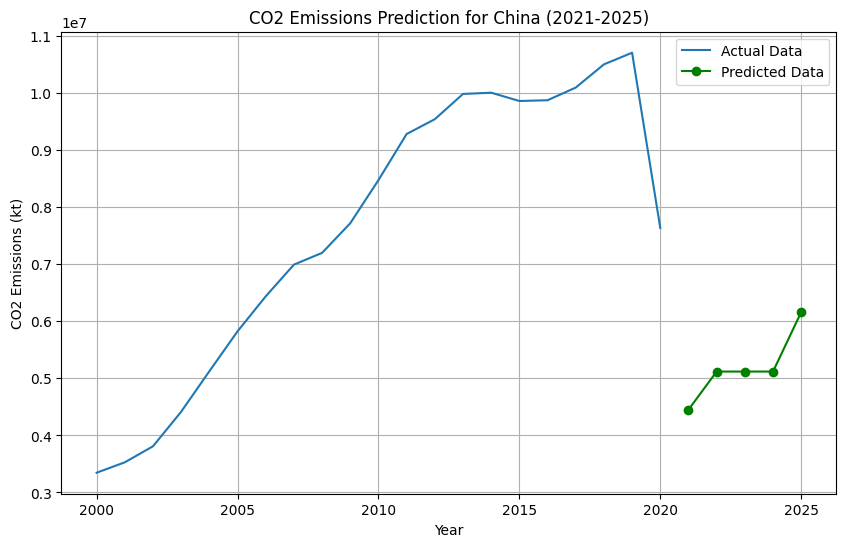

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming the dataframe `df` is already loaded
# df = ...

# Function to predict and display results for each country
def predict_co2_emissions(country):
    # Select data for the specified country
    country_data = df[df['Entity'] == country]

    # Select relevant features and the target variable
    selected_features = ['Electricity from Fossil Fuels (TWh)', 'Electricity from Renewables (TWh)', 'Electricity from Nuclear (TWh)']
    X = country_data[selected_features]
    y = country_data['CO2 Emissions (kt)']

    # Handle missing values if any
    X.fillna(method='ffill', inplace=True)
    y.fillna(method='ffill', inplace=True)

    # Scale the features
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Define the parameter grid for RandomizedSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Initialize the Random Forest model
    rf = RandomForestRegressor(random_state=42)

    # Perform Randomized Search
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    rf_random.fit(X_train, y_train)

    # Best parameters from RandomizedSearchCV
    best_params = rf_random.best_params_
    print(f"Best Parameters for {country}: {best_params}")

    # Train the Random Forest model with the best parameters
    model = RandomForestRegressor(**best_params)
    model.fit(X_train, y_train)

    # Predict values
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {country}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Create prediction data for years 2021 to 2025
    future_data = pd.DataFrame({
        'Electricity from Fossil Fuels (TWh)': [1000, 1050, 1100, 1150, 1200],  # Example future values
        'Electricity from Renewables (TWh)': [200, 220, 240, 260, 280],  # Example future values
        'Electricity from Nuclear (TWh)': [50, 55, 60, 65, 70]  # Example future values
    })
    future_data_scaled = scaler_X.transform(future_data)
    future_predictions = model.predict(future_data_scaled)

    # Display results in a table
    future_years = [2021, 2022, 2023, 2024, 2025]
    future_results = pd.DataFrame({
        'Year': future_years,
        'Predicted CO2 Emissions (kt)': future_predictions
    })

    # Display the table
    print(future_results)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['CO2 Emissions (kt)'], label='Actual Data')
    plt.plot(future_results['Year'], future_results['Predicted CO2 Emissions (kt)'], color='green', marker='o', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (kt)')
    plt.title(f'CO2 Emissions Prediction for {country} (2021-2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for Afghanistan
predict_co2_emissions('Afghanistan')

# Predictions for Argentina
predict_co2_emissions('Argentina')

# Predictions for China
predict_co2_emissions('China')
